# Hybrid Mutant Fund Analysis

### Aim :
##### To examine different aspects of the Hybrid Mutual Fund dataset and identify differences between successful and unsuccessful schemes.

## What is Hybrid Mutual Fund?
### 

- A hybrid fund is an investment portfolio with diversification across two or more types of assets.
- Typically, these funds invest in a mix of stocks and bonds.
- The term "hybrid" indicates investing in multiple asset classes.
- Investors can access various asset classes through a single hybrid fund.
- Risk tolerance in hybrid funds can vary, ranging from conservative to moderate and aggressive.
- Allocation strategy can be adjusted to align with the investor's risk preference and financial goals.
- Hybrid mutual funds are types of mutual funds that invest in more than one asset class.

# Dependencies

In [2]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
data = pd.read_excel("HMF.xlsx")

In [4]:
data.head()

Unnamed: 0  Sl_No.                         Fund_Scheme_Name       Category  \
0           0       1                     UTI Arbitrage Fund #      Arbitrage   
1           1       2                LIC MF Debt Hybrid Fund #  Conservative    
2           2       3  ICICI Prudential Regular Savings Fund #  Conservative    
3           3       4                Reliance Arbitrage Fund #      Arbitrage   
4           4       5            Kotak Equity Arbitrage Fund #      Arbitrage   

  Launch_Date Crisil_Rating  Net_Assets_(Cr)  1_Yr_Return  3_Yr_Return  \
0  2006-06-29        Rank 1          1397.70         6.52         6.24   
1  2003-06-02        Rank 1            84.93         7.68         5.92   
2  2004-03-30        Rank 1          1589.42         8.40         9.33   
3  2010-10-14        Rank 2          8535.00         6.64         6.41   
4  2005-09-29        Rank 2         13360.00         6.56         6.32   

   5_Yr_Return  ... Expense_Ratio  Sharpe_Ratio  Sortino_Ratio  Alpha  Beta  \
0         6.60  ...          0.83         -0.03          -0.04   0.60  0.33   
1         6.55  ...          2.30         -0.08          -0.12  -1.91  0.58   
2         9.92  ...          2.24          0.84           1.36   1.91  1.58   
3         6.86  ...          1.04          0.26           0.45   0.70  1.30   
4         6.75  ...          0.97          0.14           0.23   0.56  1.26   

   Std_Dev  R_Squared  Year_Trailing  Net_Return  Good  
0     0.45       0.00             13        7.40     0  
1     3.07      62.19             16        7.73     0  
2     3.57      88.45             15       10.06     1  
3     0.54      85.00              8       17.83     1  
4     0.45      87.45             13       18.45     1  

[5 rows x 21 columns]

In [5]:
data.describe()

# In pandas, the .describe() function is used to generate descriptive statistics of a DataFrame or Series. 
# It provides a summary of central tendency, dispersion, and shape of the distribution of a dataset, excluding NaN (Not a Number) values. 
# The output includes the count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile 
# (Q3), and maximum for numerical data.

Unnamed: 0     Sl_No.  Net_Assets_(Cr)  1_Yr_Return  3_Yr_Return  \
count   30.000000  30.000000        30.000000    30.000000    30.000000   
mean    14.500000  15.500000      4523.254637     7.257000     7.685000   
std      8.803408   8.803408      7952.466690     1.567997     1.924327   
min      0.000000   1.000000        12.230700     4.830000     5.740000   
25%      7.250000   8.250000       113.197500     6.127500     6.217500   
50%     14.500000  15.500000      1488.350000     6.965000     6.860000   
75%     21.750000  22.750000      4350.500000     8.385000     8.720000   
max     29.000000  30.000000     30028.000000    10.610000    11.460000   

       5_Yr_Return  Expense_Ratio  Sharpe_Ratio  Sortino_Ratio      Alpha  \
count    30.000000      30.000000     30.000000      30.000000  30.000000   
mean      8.346333       1.718333      0.165000       0.263000   0.331333   
std       1.832329       0.575243      0.362717       0.612063   1.568361   
min       6.250000       0.750000     -0.670000      -1.180000  -2.450000   
25%       6.667500       1.017500     -0.007500      -0.010000  -1.082500   
50%       7.935000       1.855000      0.240000       0.380000   0.580000   
75%       9.470000       2.197500      0.327500       0.550000   1.360000   
max      12.000000       2.400000      0.840000       1.360000   3.980000   

            Beta    Std_Dev  R_Squared  Year_Trailing  Net_Return       Good  
count  30.000000  30.000000  30.000000      30.000000   30.000000  30.000000  
mean    1.437667   4.792667  61.608333      15.266667   11.528333   0.466667  
std     1.217682   3.690865  38.442155       4.961461    4.102575   0.507416  
min    -0.690000   0.440000   0.000000       5.000000    6.650000   0.000000  
25%     0.587500   0.587500  32.210000      12.250000    7.512500   0.000000  
50%     0.995000   4.050000  85.050000      15.000000   10.225000   0.000000  
75%     2.310000   8.495000  89.907500      18.750000   14.357500   1.000000  
max     3.920000  11.740000  96.810000      26.000000   19.860000   1.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        30 non-null     int64         
 1   Sl_No.            30 non-null     int64         
 2   Fund_Scheme_Name  30 non-null     object        
 3   Category          30 non-null     object        
 4   Launch_Date       30 non-null     datetime64[ns]
 5   Crisil_Rating     30 non-null     object        
 6   Net_Assets_(Cr)   30 non-null     float64       
 7   1_Yr_Return       30 non-null     float64       
 8   3_Yr_Return       30 non-null     float64       
 9   5_Yr_Return       30 non-null     float64       
 10  Risk              30 non-null     object        
 11  Expense_Ratio     30 non-null     float64       
 12  Sharpe_Ratio      30 non-null     float64       
 13  Sortino_Ratio     30 non-null     float64       
 14  Alpha             30 non-nul

# Skewness:
In pandas, the `.skew()` function is used to calculate the skewness of a dataset or a specific Series within a DataFrame. Skewness measures the asymmetry of the probability distribution of real-valued random variables about their mean. It gives insights into the shape and tail of the distribution.

Skewness can be positive, negative, or zero:
- **Positive skew (right-skewed):** The right tail is longer or fatter than the left tail. 
    The mean and median will typically be greater than the mode.
- **Negative skew (left-skewed):** The left tail is longer or fatter than the right tail. 
    The mean and median will typically be less than the mode.
- **Zero skew:** The distribution is perfectly symmetrical.

The `.skew()` function calculates the skewness for numerical data. If you call it on a DataFrame, it will calculate the skewness for each 
numerical column. If you call it on a Series, it will calculate the skewness for that specific Series.

Here's an example of how you might use it:

```python
import pandas as pd

# Create a DataFrame
data = {'A': [1, 2, 3, 4, 5],
        'B': [10, 20, 15, 25, 30]}
df = pd.DataFrame(data)

# Calculate skewness for each column
skewness = df.skew()
print(skewness)
```

This will print the skewness for each numerical column in the DataFrame `df`. The higher the absolute value of the skewness, the more 
asymmetrical the distribution is.


# Now lets understand more easy way
## What is skew?
Alright! Imagine we have a bunch of numbers, like scores in a game. When we arrange these numbers in order from the smallest to the 
largest, we can look at how the numbers are spread out.

- **Skew is like describing how the numbers are leaning or stretching:**
  
  - If most of the scores are on the lower side, but a few are really high, it's like the numbers are leaning to the right, and we call 
    this "positive skew."
  
  - If most of the scores are on the higher side, but a few are really low, it's like the numbers are leaning to the left, and we call this 
    "negative skew."
  
  - If the scores are evenly spread, not leaning anywhere, it's like having a balanced line, and we call this "no skew" or "zero skew."

So, skew is a way to tell if our numbers are mostly on one side or the other, or if they're spread out evenly. It's like saying if our data 
is leaning to the right, leaning to the left, or standing straight and balanced. 📊👍


## What is Positive and Negative skew?
Sure! Let's imagine we have a bunch of numbers, and we're trying to understand how they are arranged.

1. **Positive Skew (Right Skew):**
   - Imagine we have a bunch of kids lined up by their height. Now, if most of the kids are a bit shorter, but there are a few very tall 
    kids that make the line look longer on one side (the right side), we call it "leaning to the right" or having a "happy face" shape. The 
    tallest kids (outliers) make the line longer on that side. This is like having more ice cream scoops on one side of a cone.


2. **Negative Skew (Left Skew):**
   - Now, let's think about the opposite. If most of the kids are a bit taller, but there are a few very short kids that make the line look 
     longer on the other side (the left side), we call it "leaning to the left" or having a "sad face" shape. The shortest kids (outliers) 
     make the line longer on that side. This is like having more ice cream scoops on one side of a cone, but this time it's the other side.


So, positive skew is like having a longer line of kids with a few really tall ones making it even longer on one side, and negative skew 
is like having a longer line with a few really short ones making it longer on the other side! It's all about how our "line" of data is leaning 
or stretching.

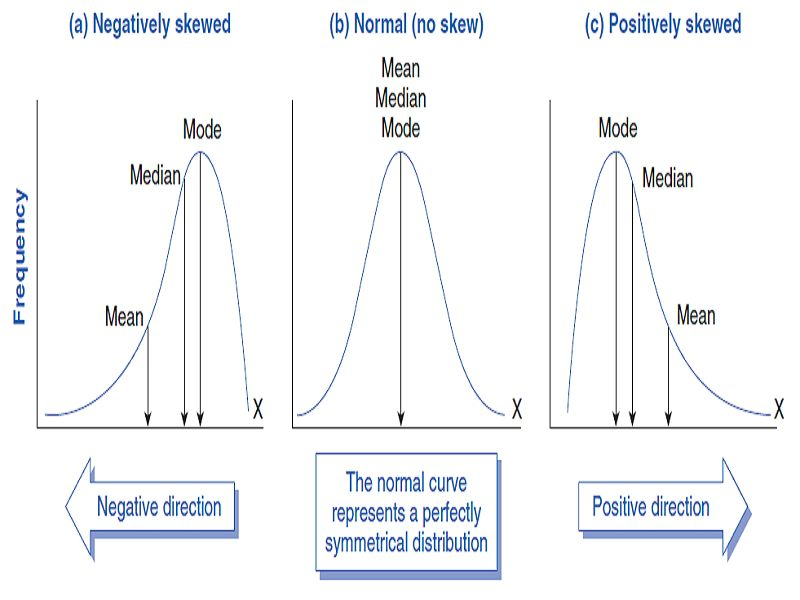

In [7]:
from IPython.display import Image
Image('Types-of-Skewed-Distribution.jpeg')

In [8]:
data.skew()

C:\Users\Amit\AppData\Local\Temp\ipykernel_4720\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Unnamed: 0         0.000000
Sl_No.             0.000000
Net_Assets_(Cr)    2.320185
1_Yr_Return        0.596719
3_Yr_Return        0.983600
5_Yr_Return        0.756581
Expense_Ratio     -0.579551
Sharpe_Ratio      -0.574800
Sortino_Ratio     -0.583262
Alpha             -0.014383
Beta               0.657854
Std_Dev            0.285394
R_Squared         -0.832263
Year_Trailing     -0.137841
Net_Return         0.463050
Good               0.140769
dtype: float64

## 1-3-5 years returns:
"Return" represents the change in the value of an investment over a specific time frame, expressed as a percentage increase or 
decrease in its value.

In [9]:
# # Create a row of 3 plots to show returns for different time periods
# fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# # Plotting the distributions for 1 year, 3 years, and 5 years returns
# sb.distplot(data['1_Yr_Return'], ax=ax[0], color='green')
# sb.distplot(data['3_Yr_Return'], ax=ax[1], color='purple')
# sb.distplot(data['5_Yr_Return'], ax=ax[2], color='deepskyblue')

# # Adding a label to indicate skewness in each plot
# skew_labels = ["Positively skewed"] * 3


# x_coords = [10.0] * 3  # x-coordinate for the label
# y_coords = [.1] * 3  # y-coordinate for the label

# # Adding the skew labels to the respective plots
# for i in range(3):
#     ax[i].text(x_coords[i], y_coords[i], skew_labels[i], fontsize=12)

# plt.show();


C:\Users\Amit\AppData\Local\Temp\ipykernel_4720\1885719121.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['1_Yr_Return'],ax=ax[0],color='green') # first diagram
C:\Users\Amit\AppData\Local\Temp\ipykernel_4720\1885719121.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['3_Yr_Retur

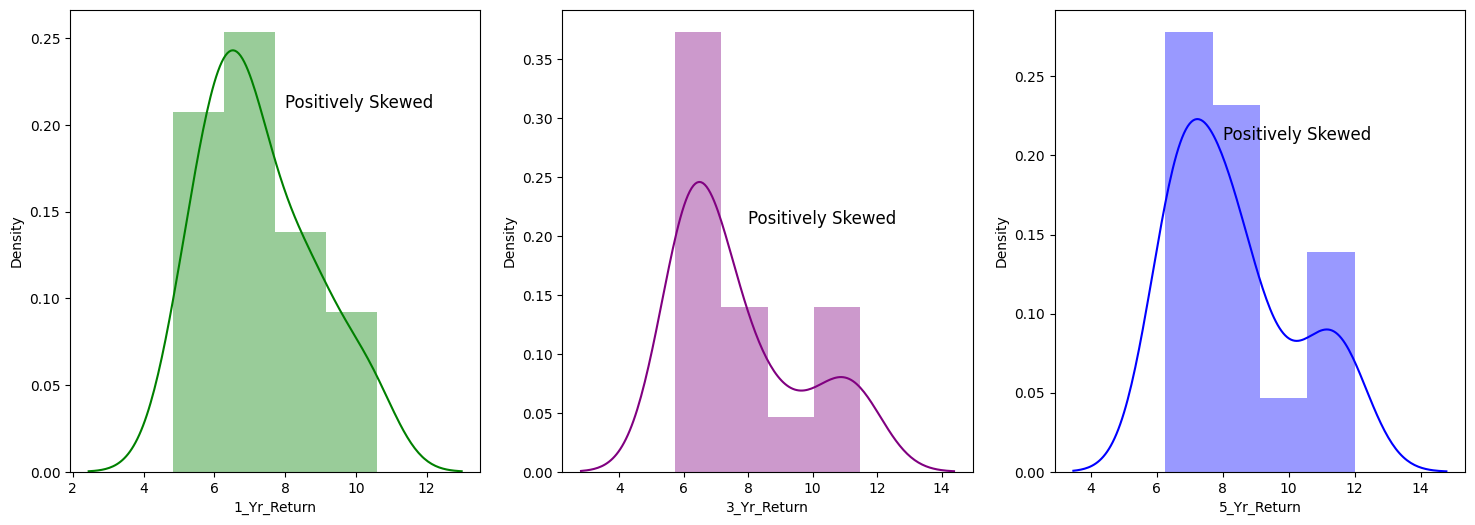

In [10]:
fig,ax =plt.subplots(1,3, figsize=(18,6)) # 1 - refer number of row , 3 - refer number of coloumns i.e 3 diagram in one row
sb.distplot(data['1_Yr_Return'],ax=ax[0],color='green') # first diagram
sb.distplot(data['3_Yr_Return'],ax=ax[1],color='purple') # second diagram
sb.distplot(data['5_Yr_Return'],ax=ax[2],color='blue') # third diagram

# Adding labels
skew_labels=["Positively Skewed","Positively Skewed","Positively Skewed"]
x_coords = [8.0,8.0,8.0] # x coordinate for label
y_coords = [0.21,0.21,0.21] # y coordinate for label

# Adding skew to respective label plots
for i in range(3):
    ax[i].text(x_coords[i],y_coords[i],skew_labels[i],fontsize=12)

plt.show()

# Now lets move on to another parameters

- Expense_ratio
- Sharpe_ratio
- Sortino_ratio

The provided text describes three important financial ratios used in investment analysis:

1. **Expense Ratio:**
   - **Definition:** The expense ratio is a percentage of a fund's assets that is used to cover various costs associated with managing and 
     operating the fund. These costs include administrative expenses, management fees, advertising, and other operating expenses.
   - **Purpose:** Investors consider the expense ratio when evaluating the overall cost of owning a particular investment fund. A lower 
     expense ratio is generally preferred as it implies a smaller portion of the investment is being used to cover expenses.

2. **Sharpe Ratio:**
   - **Definition:** The Sharpe ratio is a measure used to assess the return of an investment relative to its risk or volatility. It 
     calculates the average return earned in excess of the risk-free rate per unit of total risk (volatility).
   - **Purpose:** The Sharpe ratio helps investors evaluate the risk-adjusted return of an investment. A higher Sharpe ratio indicates a 
     better risk-adjusted performance.
     

3. **Sortino Ratio:**
   - **Definition:** The Sortino ratio is a variation of the Sharpe ratio that evaluates risk-adjusted returns. It measures the excess 
      return of an investment over the risk-free rate divided by the asset's downside deviation, focusing on the volatility associated with 
      negative returns (bad volatility).
   - **Purpose:** The Sortino ratio is useful for assessing the performance of an investment while giving more weight to downside risk. 
     It helps investors understand how well an investment avoids losses.

Overall, these ratios play crucial roles in assessing the performance, risk, and cost-efficiency of investments, aiding investors in 
making informed decisions in the financial market.

C:\Users\Amit\AppData\Local\Temp\ipykernel_4720\1916849938.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Expense_Ratio'],ax=ax[0],color='black')
C:\Users\Amit\AppData\Local\Temp\ipykernel_4720\1916849938.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Sharpe_Ratio'],ax=ax[1],

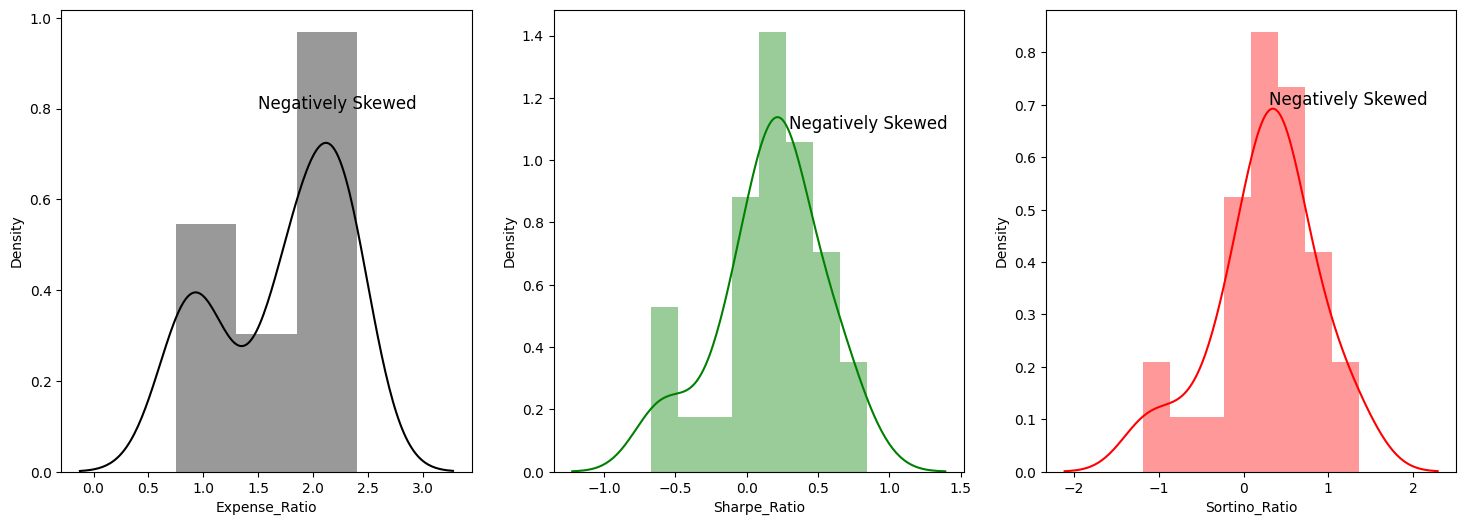

In [11]:
# Plotting the graphs for expense, sharpe, Sortino ratio
fig, ax=(plt.subplots(1,3,figsize = (18,6)))
skew_labels = ['Negatively Skewed','Negatively Skewed','Negatively Skewed']
sb.distplot(data['Expense_Ratio'],ax=ax[0],color='black')
ax[0].text(1.5,.80,skew_labels[0],fontsize=12)
sb.distplot(data['Sharpe_Ratio'],ax=ax[1],color='green')
ax[1].text(.3,1.1,skew_labels[0],fontsize=12)

sb.distplot(data['Sortino_Ratio'],ax=ax[2],color='red')
ax[2].text(.3,.70,skew_labels[0],fontsize=12)


# need to give cords seperately 
# x_coords = [.30]*3
# y_coords = [.80]*3

# for i in range(3):
#     ax[i].text(x_coords[i],y_coords[i],skew_labels[i],fontsize=12)
# for i in range(3):
#     ax[i].text(fontsize=12)

plt.show()

In [12]:
data.head()

Unnamed: 0  Sl_No.                         Fund_Scheme_Name       Category  \
0           0       1                     UTI Arbitrage Fund #      Arbitrage   
1           1       2                LIC MF Debt Hybrid Fund #  Conservative    
2           2       3  ICICI Prudential Regular Savings Fund #  Conservative    
3           3       4                Reliance Arbitrage Fund #      Arbitrage   
4           4       5            Kotak Equity Arbitrage Fund #      Arbitrage   

  Launch_Date Crisil_Rating  Net_Assets_(Cr)  1_Yr_Return  3_Yr_Return  \
0  2006-06-29        Rank 1          1397.70         6.52         6.24   
1  2003-06-02        Rank 1            84.93         7.68         5.92   
2  2004-03-30        Rank 1          1589.42         8.40         9.33   
3  2010-10-14        Rank 2          8535.00         6.64         6.41   
4  2005-09-29        Rank 2         13360.00         6.56         6.32   

   5_Yr_Return  ... Expense_Ratio  Sharpe_Ratio  Sortino_Ratio  Alpha  Beta  \
0         6.60  ...          0.83         -0.03          -0.04   0.60  0.33   
1         6.55  ...          2.30         -0.08          -0.12  -1.91  0.58   
2         9.92  ...          2.24          0.84           1.36   1.91  1.58   
3         6.86  ...          1.04          0.26           0.45   0.70  1.30   
4         6.75  ...          0.97          0.14           0.23   0.56  1.26   

   Std_Dev  R_Squared  Year_Trailing  Net_Return  Good  
0     0.45       0.00             13        7.40     0  
1     3.07      62.19             16        7.73     0  
2     3.57      88.45             15       10.06     1  
3     0.54      85.00              8       17.83     1  
4     0.45      87.45             13       18.45     1  

[5 rows x 21 columns]


## - **Alpha:**
  - Alpha helps us know if a fund is doing better or worse than expected for the risks it's taking.
  - It compares how much money the fund actually made with how much it was supposed to make based on the overall market's performance.

## - **Beta:**
  - Beta tells us how jumpy or stable a stock is compared to the entire stock market.
  - If a stock has a beta higher than 1.0, it means it jumps around more than the overall market.
  - If it's below 1.0, it means it's not as jumpy. High beta can mean more risk but a chance for higher gains, while low beta means less risk but also probably less reward.

## - **Standard Deviation:**
  - Standard deviation is a way to measure how spread out or bunched up numbers are.
  - Imagine you're shooting arrows at a target. If your shots are all close together, the standard deviation is small, but if they're all over the place, the standard deviation is large.

## - **R-squared:**
  - R-squared tells us how well the movement of an investment matches up with a comparison, like a stock market index.
  - It helps us see if the investment's ups and downs are because of the overall market or something else.

C:\Users\Amit\AppData\Local\Temp\ipykernel_4720\3900382260.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Alpha'],ax=ax[0][0],color='green')
C:\Users\Amit\AppData\Local\Temp\ipykernel_4720\3900382260.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Beta'],ax=ax[0][1],color='red

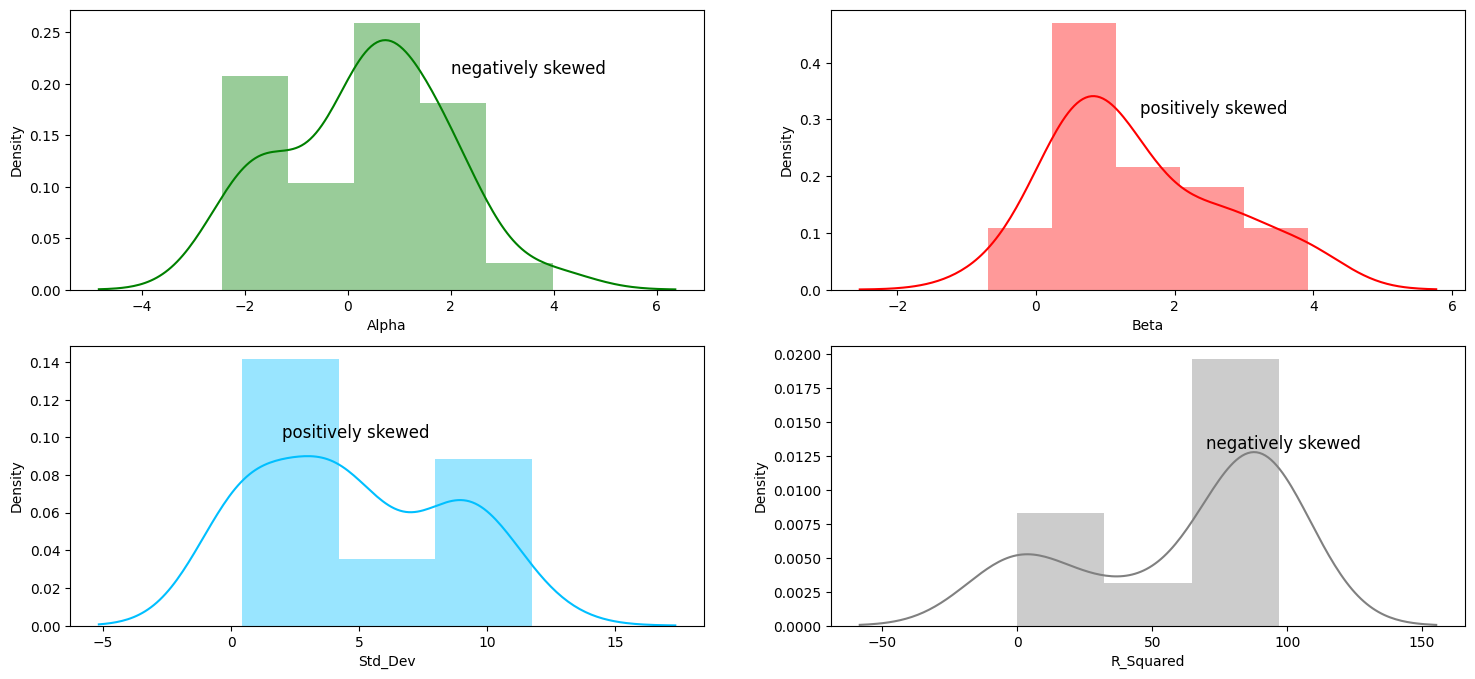

In [13]:
skew_labels=['positively skewed','negatively skewed']
fig,ax = plt.subplots(2,2,figsize=(18,8))

sb.distplot(data['Alpha'],ax=ax[0][0],color='green')
ax[0][0].text(2.0,0.21,skew_labels[1],fontsize=12)

sb.distplot(data['Beta'],ax=ax[0][1],color='red')
ax[0][1].text(1.5,0.31,skew_labels[0],fontsize=12)

sb.distplot(data['Std_Dev'],ax=ax[1][0],color='deepskyblue')
ax[1][0].text(2,0.1,skew_labels[0],fontsize=12)

sb.distplot(data['R_Squared'],ax=ax[1][1],color='grey')
ax[1][1].text(70,0.0130,skew_labels[1],fontsize=12)
# ax[1,1].text(2.5,0.01,"Negatively skewed")

plt.show()

In [14]:
data.head()

Unnamed: 0  Sl_No.                         Fund_Scheme_Name       Category  \
0           0       1                     UTI Arbitrage Fund #      Arbitrage   
1           1       2                LIC MF Debt Hybrid Fund #  Conservative    
2           2       3  ICICI Prudential Regular Savings Fund #  Conservative    
3           3       4                Reliance Arbitrage Fund #      Arbitrage   
4           4       5            Kotak Equity Arbitrage Fund #      Arbitrage   

  Launch_Date Crisil_Rating  Net_Assets_(Cr)  1_Yr_Return  3_Yr_Return  \
0  2006-06-29        Rank 1          1397.70         6.52         6.24   
1  2003-06-02        Rank 1            84.93         7.68         5.92   
2  2004-03-30        Rank 1          1589.42         8.40         9.33   
3  2010-10-14        Rank 2          8535.00         6.64         6.41   
4  2005-09-29        Rank 2         13360.00         6.56         6.32   

   5_Yr_Return  ... Expense_Ratio  Sharpe_Ratio  Sortino_Ratio  Alpha  Beta  \
0         6.60  ...          0.83         -0.03          -0.04   0.60  0.33   
1         6.55  ...          2.30         -0.08          -0.12  -1.91  0.58   
2         9.92  ...          2.24          0.84           1.36   1.91  1.58   
3         6.86  ...          1.04          0.26           0.45   0.70  1.30   
4         6.75  ...          0.97          0.14           0.23   0.56  1.26   

   Std_Dev  R_Squared  Year_Trailing  Net_Return  Good  
0     0.45       0.00             13        7.40     0  
1     3.07      62.19             16        7.73     0  
2     3.57      88.45             15       10.06     1  
3     0.54      85.00              8       17.83     1  
4     0.45      87.45             13       18.45     1  

[5 rows x 21 columns]

## Kurtosis

Kurtosis is a statistical measure that helps us understand the shape of the distribution of a dataset, specifically focusing on the tails or extremes of the distribution. It provides insights into whether the data points are more or less dispersed in the tails compared to a normal distribution.

There are two main types of kurtosis: positive (leptokurtic) and negative (platykurtic).

1. **Positive Kurtosis (Leptokurtic):**
   - A distribution with positive kurtosis, also known as leptokurtic, has fatter tails and a sharper peak compared to a normal distribution.
   - In a leptokurtic distribution, there are more data points in the tails, indicating a higher probability of extreme values or outliers.
   - This type of distribution often arises in financial markets, where extreme events, like market crashes or sudden price spikes, are more common than what a normal distribution would predict.

2. **Negative Kurtosis (Platykurtic):**
   - A distribution with negative kurtosis, also known as platykurtic, has thinner tails and a flatter peak compared to a normal distribution.
   - In a platykurtic distribution, extreme values are less likely to occur, and the data points are more clustered around the mean.
   - This type of distribution is often seen in stable and less volatile markets or when dealing with less unpredictable phenomena.

In simpler terms:

- **Positive Kurtosis (Leptokurtic):**
  - Tails of the distribution are fatter, indicating more extreme values. 
  - The data points are more spread out from the mean, suggesting higher volatility or risk.

- **Negative Kurtosis (Platykurtic):**
  - Tails of the distribution are thinner, indicating fewer extreme values.
  - The data points are more clustered around the mean, suggesting lower volatility or risk.

Understanding the kurtosis of a dataset helps in risk assessment, portfolio management, pricing of financial instruments, and decision-making in various fields where understanding the distribution of data is crucial.


#### Shape of it


##### Positive Kurtosis (Leptokurtic):
- Imagine a histogram or a line plot where the center peak is tall and the tails on both sides extend higher and are more pronounced than a standard bell curve. The tails are "fatter" than a normal distribution.


##### Negative Kurtosis (Platykurtic):
- Picture a flatter histogram or line plot where the center peak is shorter, and the tails on both sides are thinner and do not extend as high as a standard bell curve. The tails are "thinner" than a normal distribution.


## Where it used generally

1. **Finance and Risk Assessment:**
   - In finance, kurtosis helps assess the risk associated with an investment. 
   - A higher kurtosis (leptokurtic) indicates more extreme price movements, implying a riskier investment with potential for larger gains but also larger losses due to the fatter tails.

2. **Insurance and Actuarial Science:**
   - In insurance, kurtosis is vital for understanding the probability of extreme events (e.g., natural disasters) and pricing insurance policies accordingly.
   - A leptokurtic distribution suggests a higher likelihood of extreme, costly events, affecting insurance premiums.

3. **Stock Market Analysis:**
   - Kurtosis is used to analyze stock price movements. A leptokurtic distribution may imply a higher probability of significant price swings, affecting investment strategies and risk management.

4. **Economics and Price Movements:**
   - In economics, kurtosis helps model price movements of commodities or goods.
   - For example, in the pricing of essential goods, a leptokurtic distribution may indicate higher volatility and uncertainty in pricing.

5. **Biostatistics and Health Sciences:**
   - In biostatistics, kurtosis helps analyze data distributions related to health and diseases.
   - For instance, a leptokurtic distribution in a study analyzing disease occurrence might suggest a higher likelihood of extreme cases.

In practical terms, understanding kurtosis allows professionals to anticipate and plan for extreme events or outcomes. It's an essential tool for risk assessment, decision-making, and tailoring strategies to better align with the distribution of data in various domains.


# In short and simple
### Kurtosis Greater than +1:

When the kurtosis value is greater than +1, it indicates a distribution with heavier tails and a sharper peak (leptokurtic distribution).
This suggests that the dataset has a higher probability of extreme values or outliers compared to a normal distribution.

### Kurtosis Less than -1:

When the kurtosis value is less than -1, it indicates a distribution with lighter tails and a flatter peak (platykurtic distribution).
This suggests that the dataset has fewer extreme values or outliers compared to a normal distribution.
So, in the revised interpretation, a kurtosis less than -1 indicates a platykurtic distribution, which means the distribution is flatter and has lighter tails compared to a normal distribution.





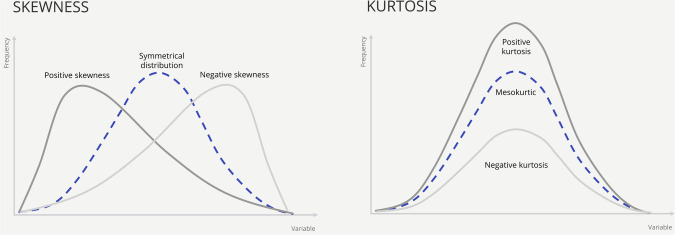

In [15]:
from IPython.display import Image
Image("kurtosis.jpg")

In [16]:
data.kurt()

C:\Users\Amit\AppData\Local\Temp\ipykernel_4720\2907027414.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurt()


Unnamed: 0        -1.200000
Sl_No.            -1.200000
Net_Assets_(Cr)    4.586372
1_Yr_Return       -0.449587
3_Yr_Return       -0.510389
5_Yr_Return       -0.744381
Expense_Ratio     -1.316102
Sharpe_Ratio       0.334920
Sortino_Ratio      0.613696
Alpha             -0.337668
Beta              -0.348688
Std_Dev           -1.298537
R_Squared         -1.111728
Year_Trailing      0.109243
Net_Return        -1.097737
Good              -2.126913
dtype: float64

In [17]:
data.head()

Unnamed: 0  Sl_No.                         Fund_Scheme_Name       Category  \
0           0       1                     UTI Arbitrage Fund #      Arbitrage   
1           1       2                LIC MF Debt Hybrid Fund #  Conservative    
2           2       3  ICICI Prudential Regular Savings Fund #  Conservative    
3           3       4                Reliance Arbitrage Fund #      Arbitrage   
4           4       5            Kotak Equity Arbitrage Fund #      Arbitrage   

  Launch_Date Crisil_Rating  Net_Assets_(Cr)  1_Yr_Return  3_Yr_Return  \
0  2006-06-29        Rank 1          1397.70         6.52         6.24   
1  2003-06-02        Rank 1            84.93         7.68         5.92   
2  2004-03-30        Rank 1          1589.42         8.40         9.33   
3  2010-10-14        Rank 2          8535.00         6.64         6.41   
4  2005-09-29        Rank 2         13360.00         6.56         6.32   

   5_Yr_Return  ... Expense_Ratio  Sharpe_Ratio  Sortino_Ratio  Alpha  Beta  \
0         6.60  ...          0.83         -0.03          -0.04   0.60  0.33   
1         6.55  ...          2.30         -0.08          -0.12  -1.91  0.58   
2         9.92  ...          2.24          0.84           1.36   1.91  1.58   
3         6.86  ...          1.04          0.26           0.45   0.70  1.30   
4         6.75  ...          0.97          0.14           0.23   0.56  1.26   

   Std_Dev  R_Squared  Year_Trailing  Net_Return  Good  
0     0.45       0.00             13        7.40     0  
1     3.07      62.19             16        7.73     0  
2     3.57      88.45             15       10.06     1  
3     0.54      85.00              8       17.83     1  
4     0.45      87.45             13       18.45     1  

[5 rows x 21 columns]

In [25]:
# It returns the list of items that are unique in coloumn in 'category'
category = data['Category'].unique().tolist()
category

['Arbitrage', 'Conservative ', 'Aggressive ']

In [23]:
category_freq = data['Category'].value_counts().to_dict()
# It return count of each unique item in form of dictionary
category_freq

{'Conservative ': 11, 'Aggressive ': 10, 'Arbitrage': 9}

In [32]:
# Function to return list of categories
def getList(category_frequency): 
    list = [] 
    for value in category_frequency.values(): 
        list.append(value) 
          
    return list

category_count = getList(category_freq) 
# this is to return list of values obtained in dictionary
category_count

[11, 10, 9]

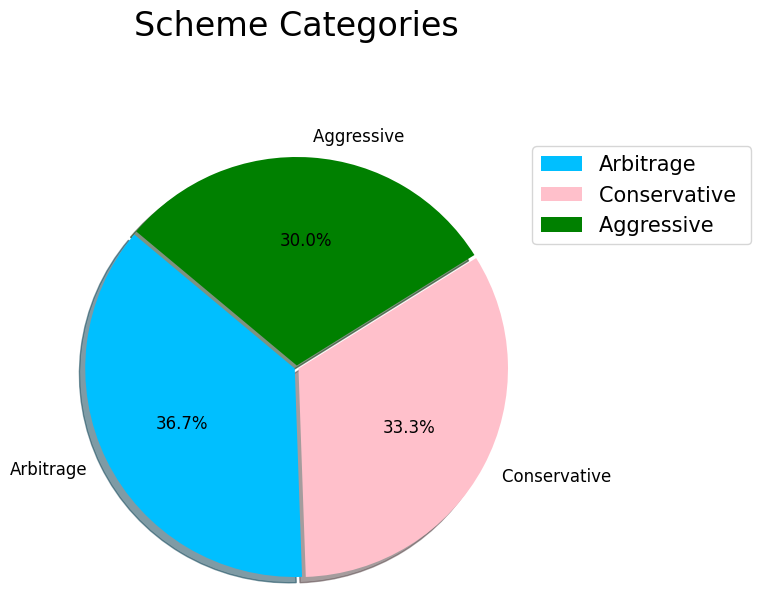

In [42]:
colors = ['deepskyblue','pink','green']
explode = (0.01,0.01,0.01)

# Plotting pie chart for categories
plt.pie(category_count, explode=explode, labels=category, colors=colors, shadow=True, startangle=140, autopct='%1.1f%%')
plt.title('Scheme Categories', y=1.20, fontsize='24')
plt.legend(category,loc='upper right', bbox_to_anchor=(1.50,1.0), fontsize=15)
plt.axis('equal')
plt.rcParams['figure.figsize']=(6,6)
plt.rcParams['font.size'] = 12
plt.show()

#### ->It shows that out of my 30 hybrid fund schemes 30% are Aggressive, 33.3 % are Conservative and 36.7% are Arbitrage.

### Arbitrage:
     Arbitrage funds are for investors who want to profit from volatile markets without taking on too much risk. They are low risk funds where each security is bought and sold simultaneously and there is virtually none of the risk involved with longer-term investments. Arbitrage funds are not very profitable during stable markets. These are beneficial when the market is highly volatile.
     
### Conservative: 
    The conservative hybrid schemes are mandated to invest 10 to 25 per cent of their total assets in equity and equity-related instruments. The rest (75 per cent to 90 per cent) of the corpus will be invested in debt instruments. The little exposure to equity helps these schemes to earn little extra returns than pure debt funds. This also makes these schemes riskier than the pure debt funds.
    
### Aggressive:
      Aggressive Hybrid Funds will invest 65% to 80% of total assets in equities and 20% to 35% in debt instruments. These schemes are treated as equity schemes for the purpose of taxation. Aggressive growth funds seek to provide above average market returns and are more promising of the lot.

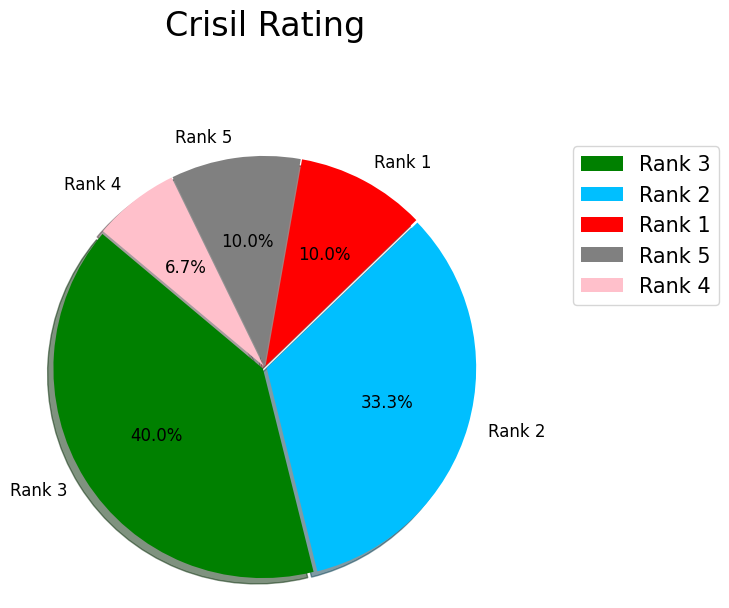

In [46]:
rank=data['Crisil_Rating'].unique().tolist() #It returns list of items that are unique in the column "Crisil_Rating"
#print(rank)
rank_frequency = data['Crisil_Rating'].value_counts().to_dict() #It returns the count of each unique item in the form of dictionary
#print(rank_frequency)
count = rank_frequency.values() #It returns the "values" in key:value (unique item : frequency) pair of dictionary obtained in last line.
#print(count)

# function returns the list of rank_frequency
def getList(rank_frequency): 
    list = [] 
    for value in rank_frequency.values(): 
        list.append(value) 
          
    return list
      
rank_count=getList(rank_frequency) #This is to return list of values obtained in the dictionary.

#print(rank_count)

labels = ['Rank 3', 'Rank 2', 'Rank 1', 'Rank 5', 'Rank 4']
colors = ['green','deepskyblue','red', 'grey', 'pink']
explode = (0.01, 0.01, 0.01, 0.01, 0.01)  

# plot pie chart for crisil data
plt.pie(rank_count, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140, autopct='%1.1f%%')
plt.title('Crisil Rating', y=1.20, fontsize='24')
plt.axis('equal')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize']=(6,6)
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.50,1.0), fontsize=15)
plt.show()

### Crisil Rating Explained:
Crisil rating is a method used to evaluate mutual funds and understand how well they are managed and performing. This evaluation is based on the best practices globally and considers various aspects of the mutual fund's portfolio and performance.

The evaluation involves analyzing a combination of Net Asset Value (NAV) and portfolio-based attributes. Here's what these terms mean:
- **Net Asset Value (NAV)**: It's the value of each unit of the mutual fund. It's calculated by dividing the total value of all the securities in the portfolio by the total number of units issued to investors.
  
- **Portfolio-based Attributes**: These are characteristics of the mutual fund's investments, including asset allocation, asset concentration, liquidity (how easy it is to buy or sell), and the overall quality of the assets held by the fund.

By considering these factors, Crisil rating offers a comprehensive analysis of mutual funds. The goal is to provide investors with a clear and simple understanding of how a particular mutual fund is likely to perform based on these critical parameters.

### -> Understanding the Pie Chart:
Let's break down the pie chart to understand the distribution of schemes based on their Crisil ratings in more detail.

Imagine you have a total of 30 different mutual fund schemes. Each scheme is assigned a rank or Crisil rating, ranging from 1 (the highest) to 5 (the lowest). Now, let's look at how these schemes are distributed in the pie chart, based on their respective ratings:

- **Rank 1 (10%)**: This category represents the highest-rated schemes, making up 10% of the total. These funds are deemed to be very well managed and have strong performance indicators.

- **Rank 2 (33.3%)**: The next level includes 33.3% of your total schemes. These funds are also rated well and have good management practices.

- **Rank 3 (40%)**: Nearly half of your total schemes, 40% to be exact, fall into this category. These funds are considered to have a moderate level of performance and management quality.

- **Rank 4 (6.7%)**: A smaller portion, 6.7%, consists of funds in this category. These are rated lower and might have some room for improvement in terms of performance and management.

- **Rank 5 (10%)**: Similar to rank 1, this category also represents 10% of the total schemes. These funds are rated the lowest and may require careful consideration before investing due to their lower performance and management rating.

This pie chart provides a visual representation of how your schemes are distributed across different Crisil ratings, giving you valuable insights into the overall quality and performance of your mutual fund portfolio.

## 1 Year Return

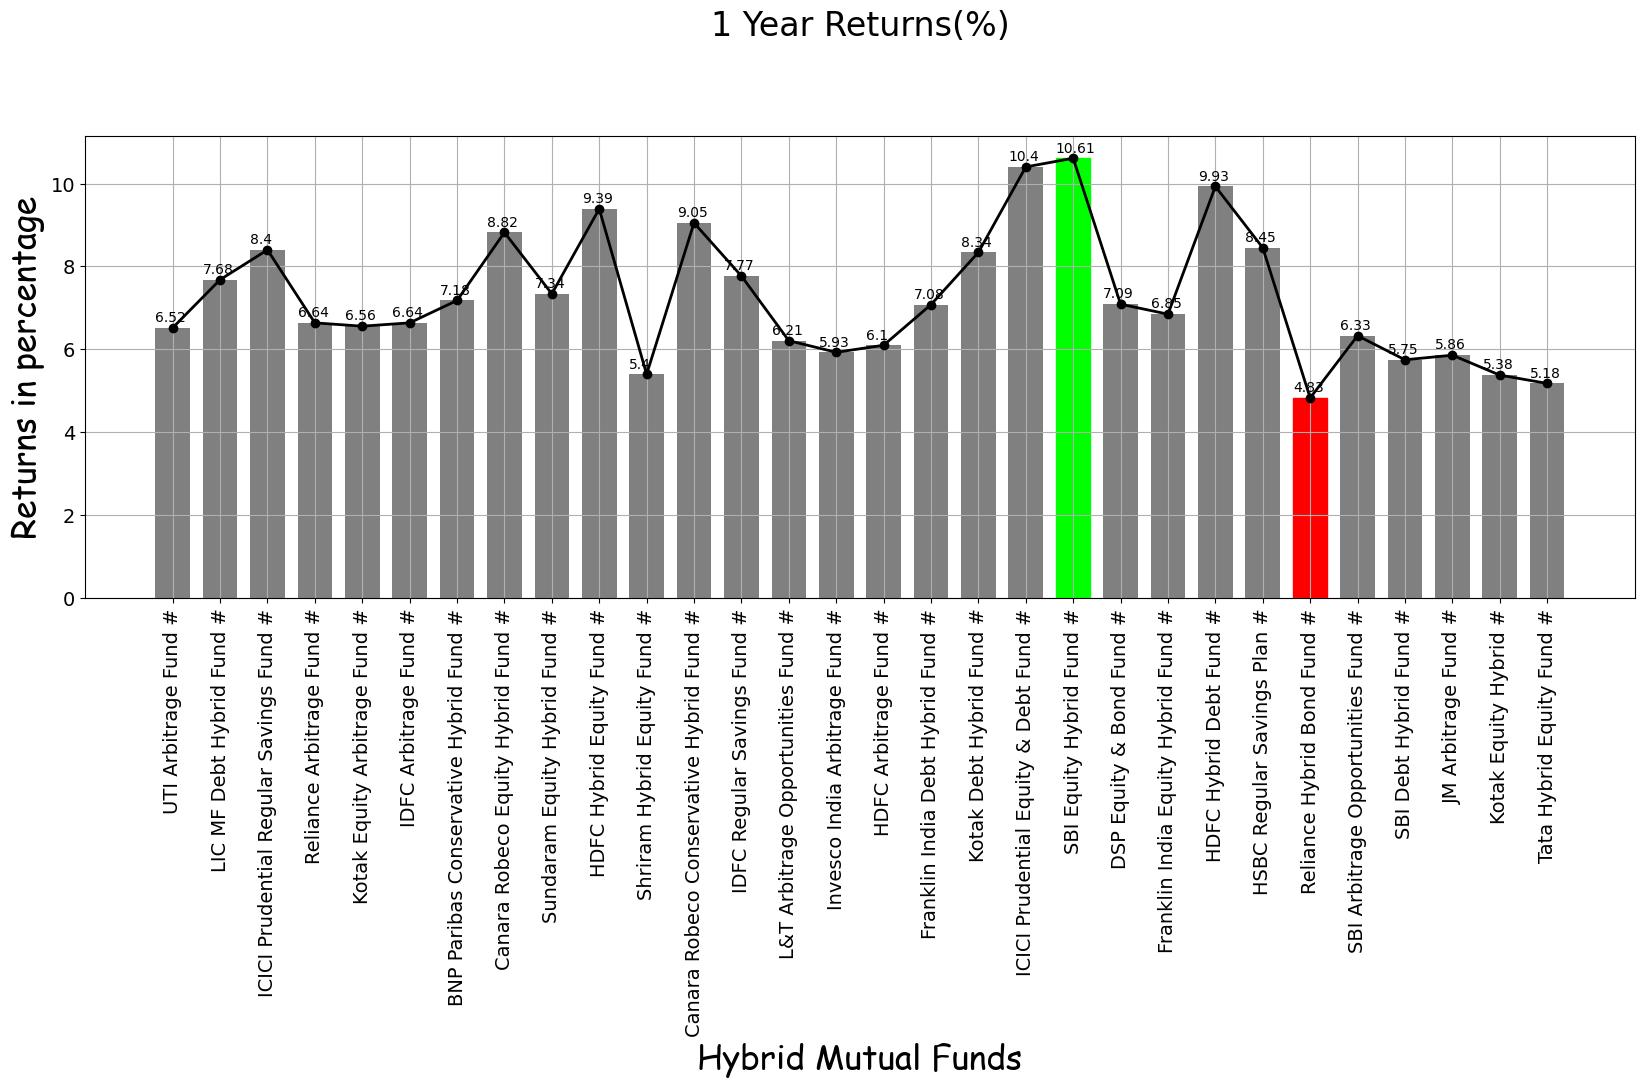

In [56]:
# X represents the fund scheme names
X = data['Fund_Scheme_Name']

# Y represents the 1-year returns for the funds
Y = data['1_Yr_Return']

# Create a bar chart with fund scheme names on the x-axis and 1-year returns on the y-axis
bars = plt.bar(X, Y, color='grey', width=0.73)

# Highlight the lowest and highest returns bars with different colors
bars[data['1_Yr_Return'].idxmin()].set_color('red')
bars[data['1_Yr_Return'].idxmax()].set_color('lime')

# Set the title and labels for the chart
plt.title('1 Year Returns(%)', y=1.20, fontsize=24)
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS")

# Plot the data points for fund scheme names and 1-year returns
plt.plot(X, Y, linewidth=2.0, color='black', marker='o', markersize=6)


# Add a grid to the chart and rotate x-axis labels vertically for better readability
plt.grid()
plt.xticks(X, rotation='vertical')

# Set the figure size and font size
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14

# Add labels with the 1-year returns above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.15, yval, fontsize=10)


plt.show()

The combination of a bar plot and a line plot with annotations here illustrates the correlation between "Hybrid Mutual Funds" and their "1-year returns." Notably, the bars representing the schemes with the lowest and highest returns are highlighted in distinct colors.

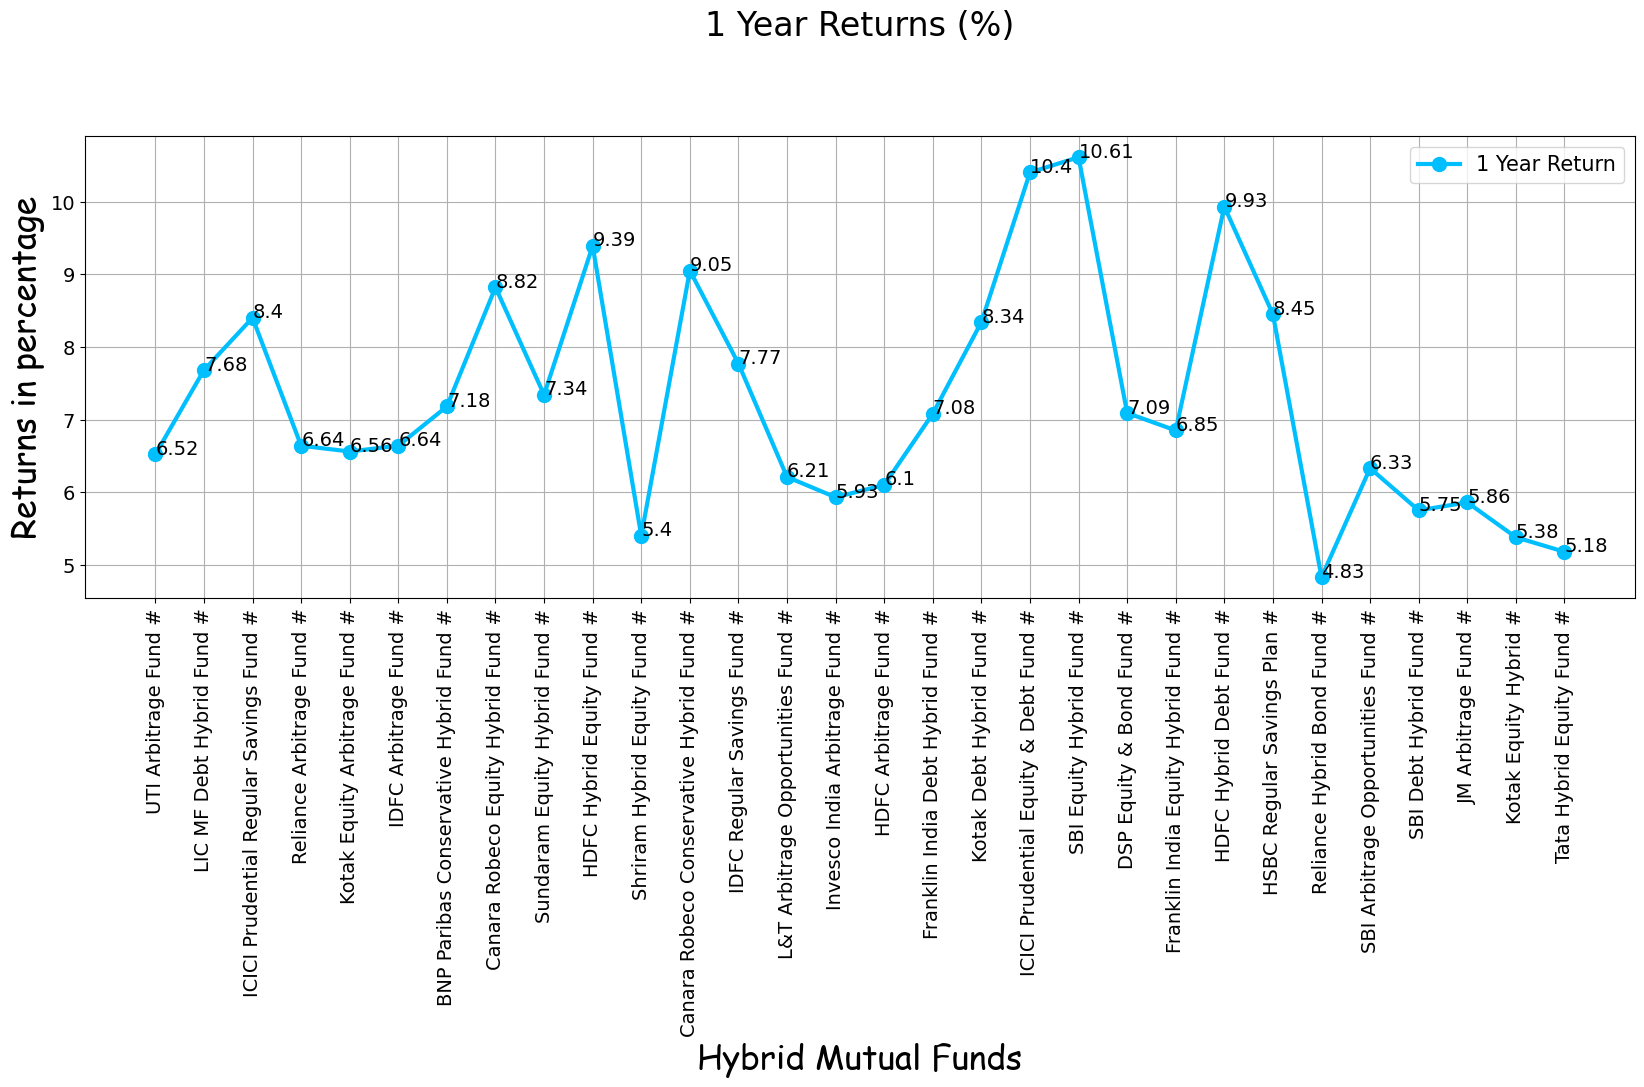

In [63]:
# Extracting 1-year return data
returns = data['1_Yr_Return']

# Creating a line plot with annotations
plt.plot(X, returns, linewidth=3.0, color='deepskyblue', marker='o', markersize=10)

# Adding labels and title
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.title('1 Year Returns (%)', y=1.20, fontsize=24)

# Adding legend and customizing
labels = ['1 Year Return']
plt.legend(labels, loc='upper right', fontsize=15)

# Rotating x-axis labels and adding a grid
plt.xticks(X, rotation='vertical')
plt.grid()

# Annotating data points on the plot
# str(j): Converts the value j (1-year return for a specific mutual fund) to a string, so it can be displayed as text.
# xy=(i, j): Specifies the point where the annotation will be placed, using the (x, y) coordinates.
# i is the x-coordinate (representing the hybrid mutual fund), and j is the y-coordinate (representing the 1-year return).
# The purpose of using annotate() in this code is to display the 1-year return value for each hybrid mutual fund at its 
# respective position on the plot. This provides a clear and visual representation of the exact numerical values corresponding to each data point, 
# aiding in data interpretation and analysis.
for i, j in zip(X, returns):
    plt.annotate(str(j), xy=(i, j))

# Setting figure size and font size
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14

# Displaying the plot
plt.show()


In [64]:
returns

0      6.52
1      7.68
2      8.40
3      6.64
4      6.56
5      6.64
6      7.18
7      8.82
8      7.34
9      9.39
10     5.40
11     9.05
12     7.77
13     6.21
14     5.93
15     6.10
16     7.08
17     8.34
18    10.40
19    10.61
20     7.09
21     6.85
22     9.93
23     8.45
24     4.83
25     6.33
26     5.75
27     5.86
28     5.38
29     5.18
Name: 1_Yr_Return, dtype: float64

The depicted line graph showcases the relationship between "Hybrid Mutual Fund" and their corresponding "1 Year Returns" using a series of data points connected by straight lines. Each data point is marked distinctly, making it straightforward to compare points and identify any outliers within the data. This graphical representation facilitates a clear visualization of how different mutual funds perform in terms of their 1-year returns.

### 3 Year Return

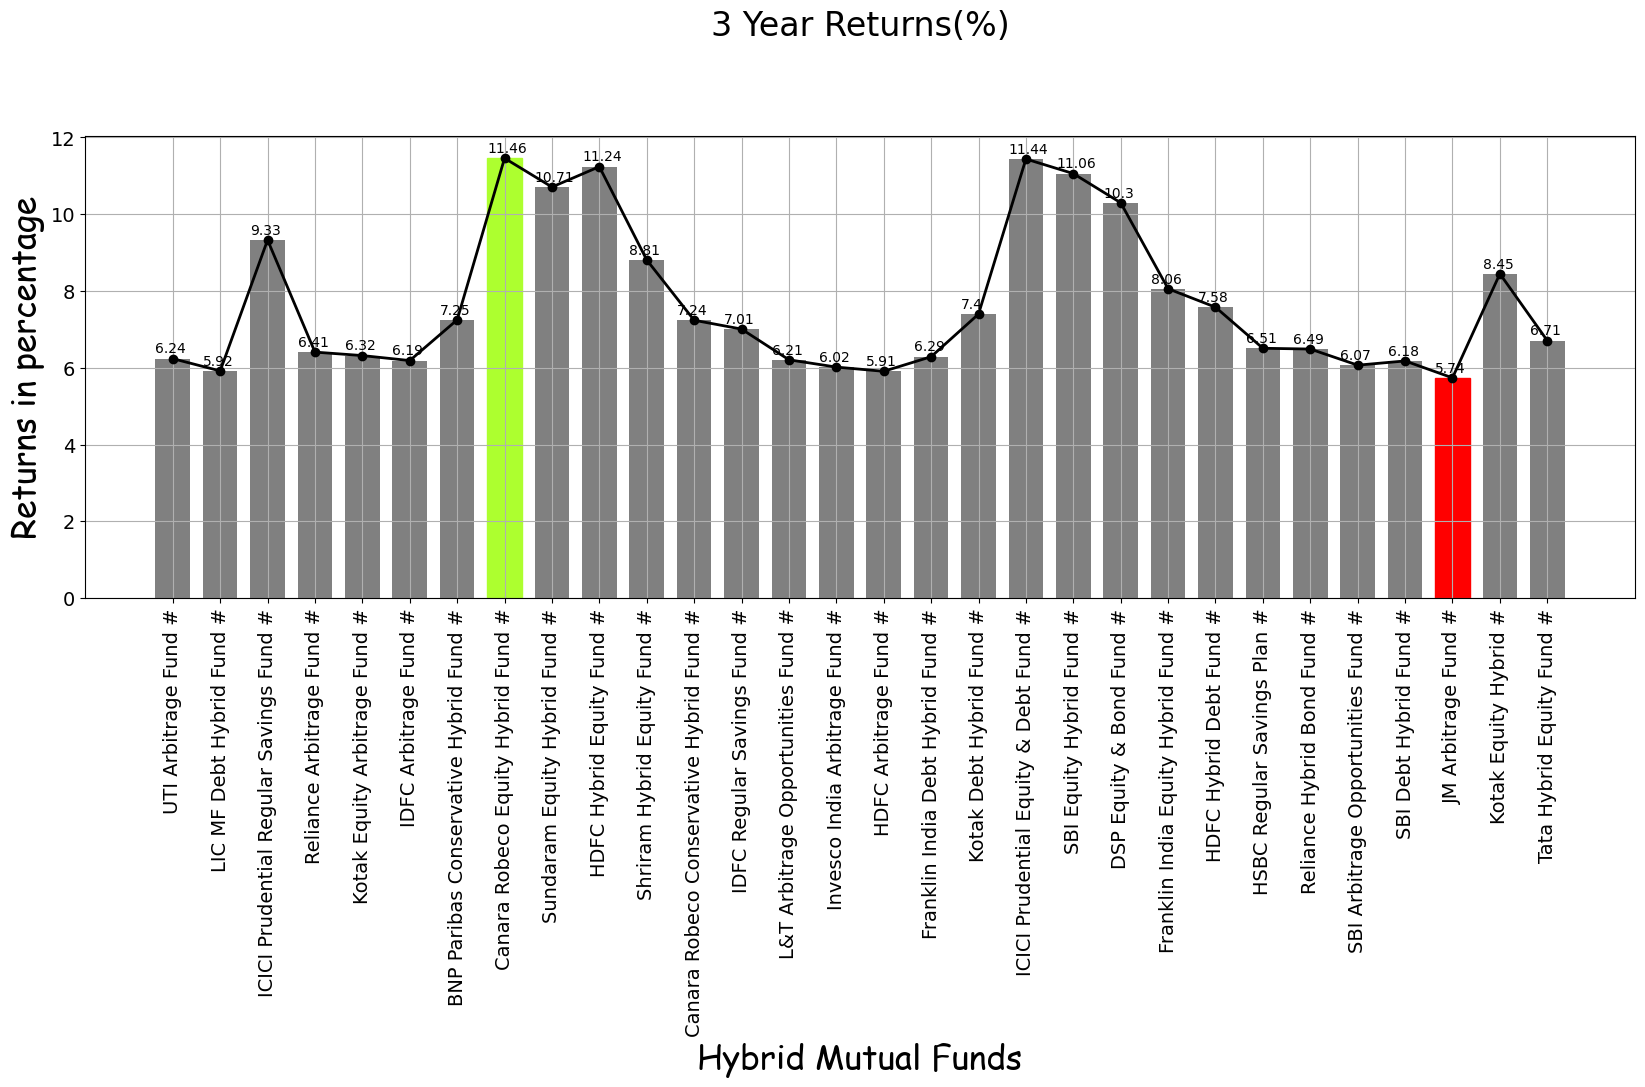

In [65]:
Y=data['3_Yr_Return']
#Y.head(5)

bars = plt.bar(X,Y, color='grey', width=0.73)
bars[data['3_Yr_Return'].idxmin()].set_color('red')
bars[data['3_Yr_Return'].idxmax()].set_color('greenyellow')
plt.plot(X, Y, linewidth='2.0', color='black', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('3 Year Returns(%)', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

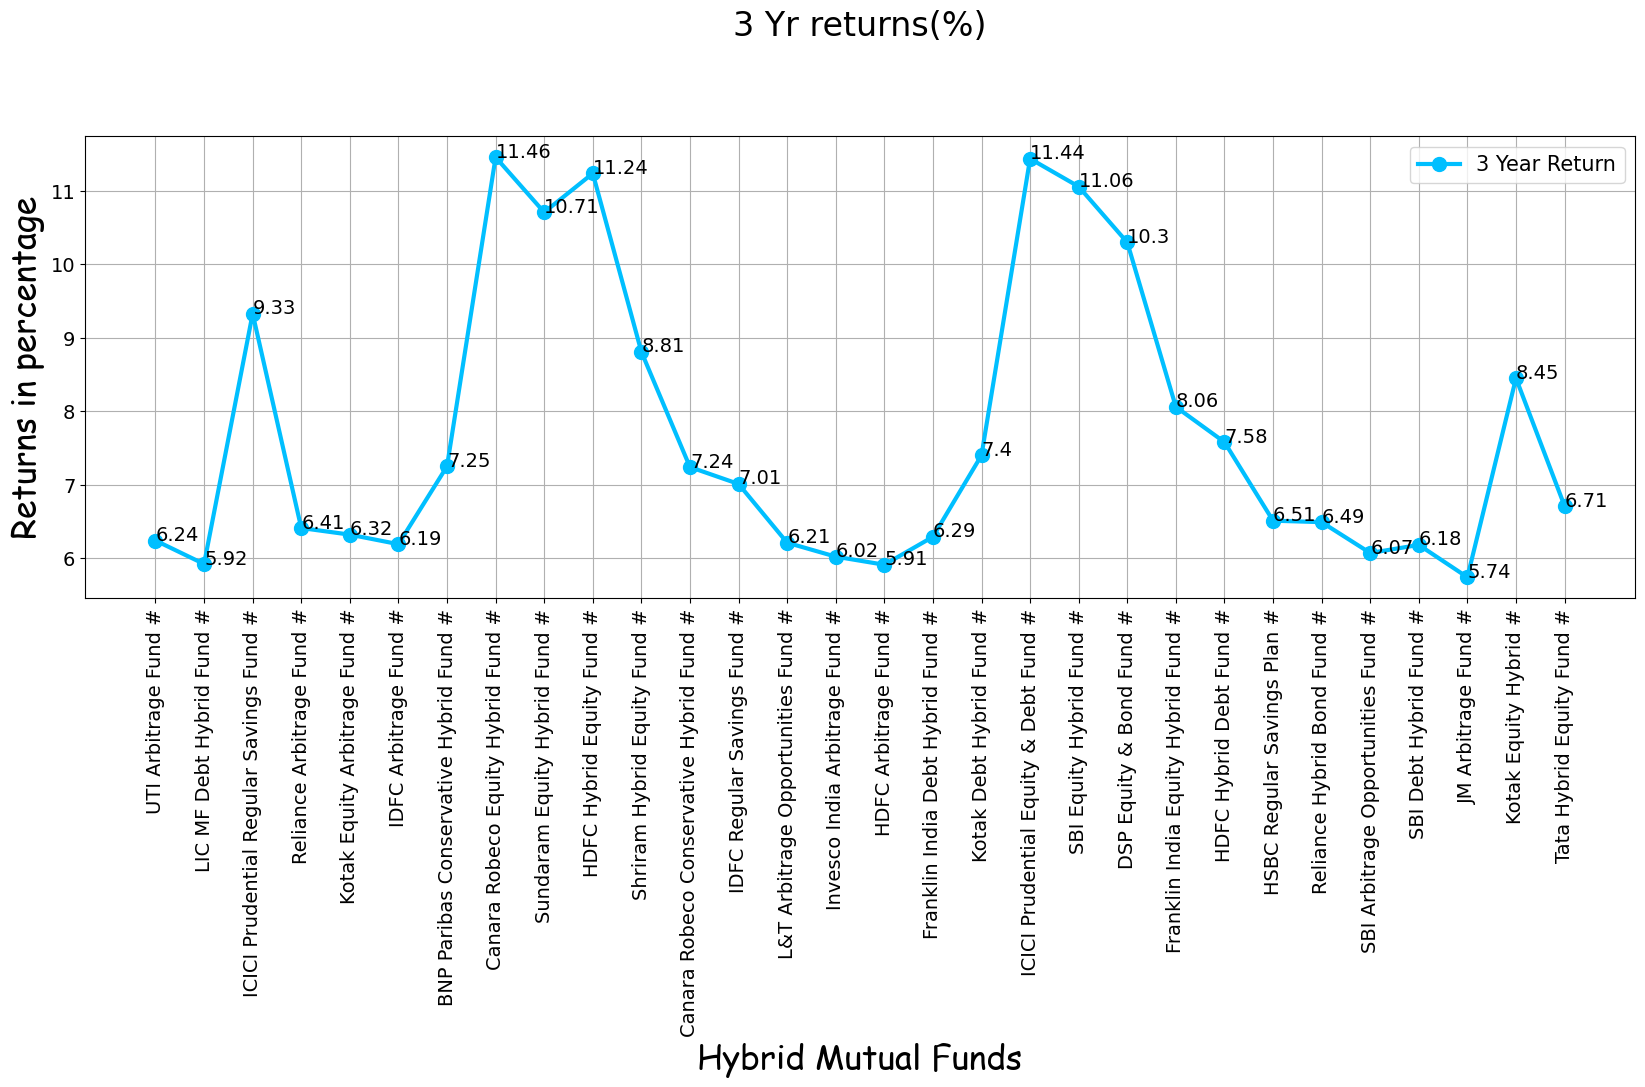

In [71]:
X=data['Fund_Scheme_Name']
Y=data['3_Yr_Return']

labels=['3 Year Return']
lines=plt.plot(X, Y, linewidth='3.0', color='deepskyblue', marker='o', markersize='10')

plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.title('3 Yr returns(%)', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()

for i,j in zip(X,Y):
    plt.annotate(str(j),xy=(i,j))


plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

### 5 Year Return

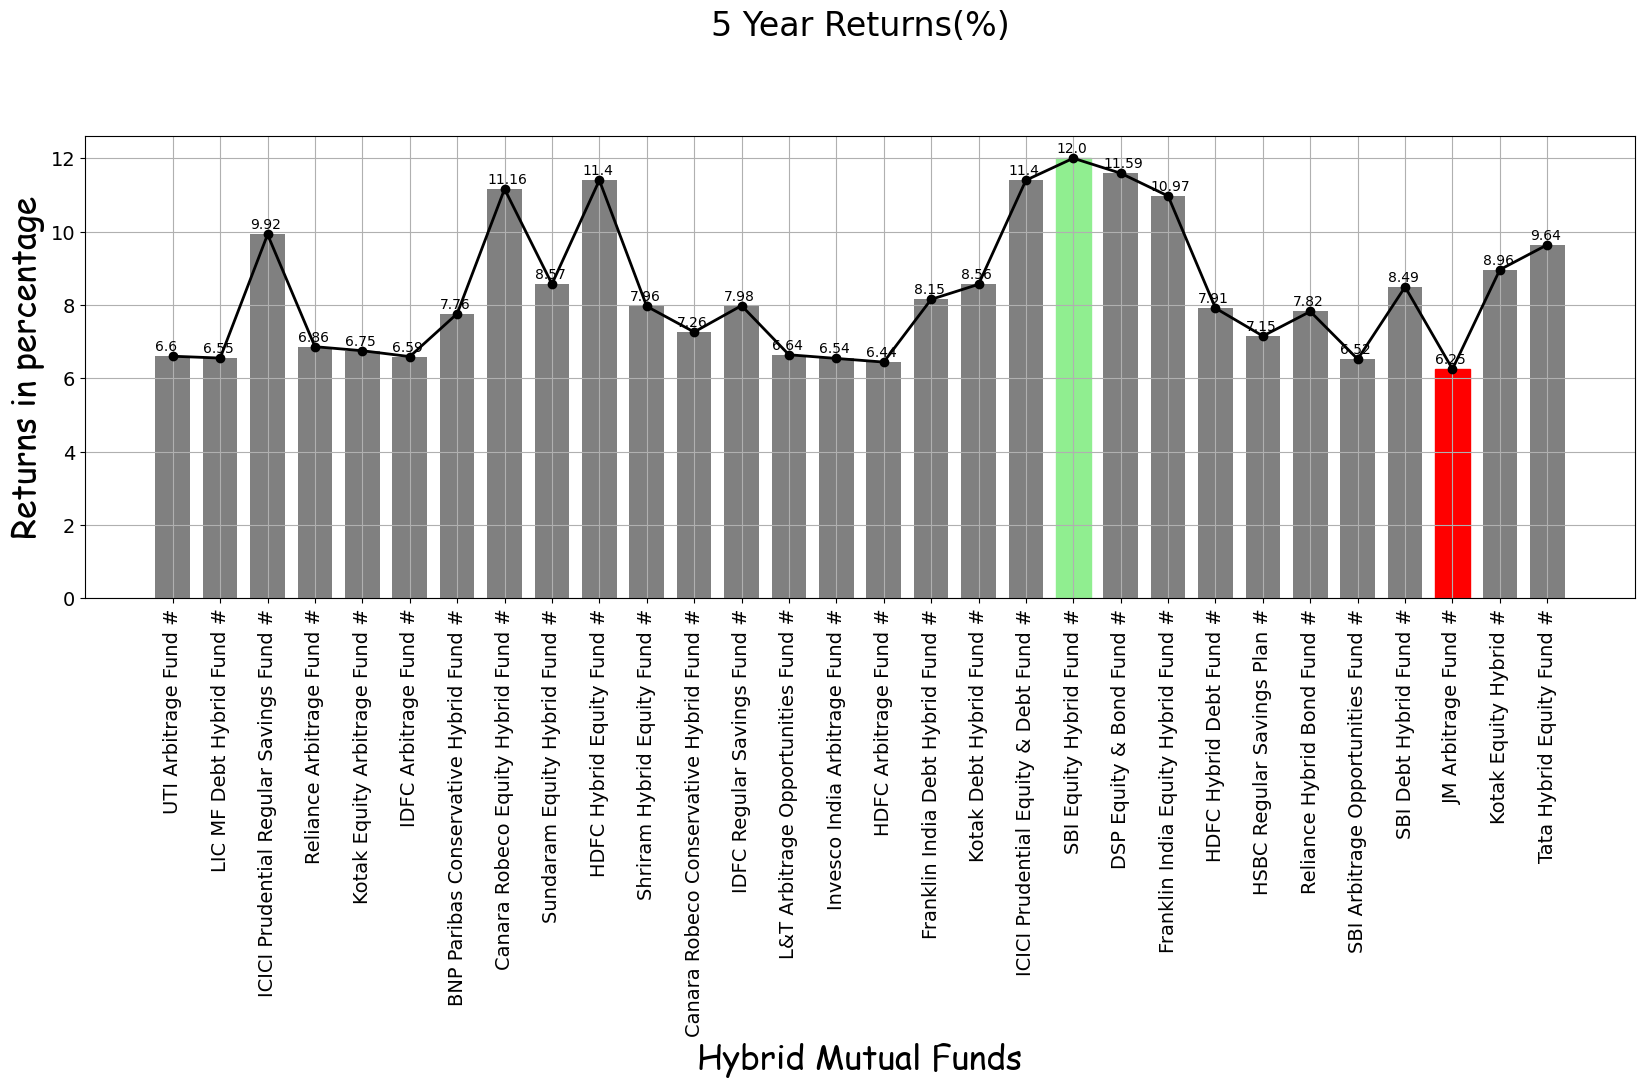

In [79]:

# Extracting data
X = data['Fund_Scheme_Name']  # Hybrid mutual fund names
Y = data['5_Yr_Return']  # 5-year returns

# Creating a bar chart
bars = plt.bar(X, Y, color='grey', width=0.73)

# Customizing bar colors for min and max returns
bars[data['5_Yr_Return'].idxmin()].set_color('red')
bars[data['5_Yr_Return'].idxmax()].set_color('lightgreen')

# Creating a line plot
plt.plot(X, Y, linewidth=2.0, color='black', marker='o', markersize=6)

# Adding labels and title
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS")
plt.title('5 Year Returns(%)', y=1.20, fontsize=24)

# Customizing the plot
plt.grid()
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14

# Adding value labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.15, yval, fontsize=10)

# Displaying the plot
plt.show()


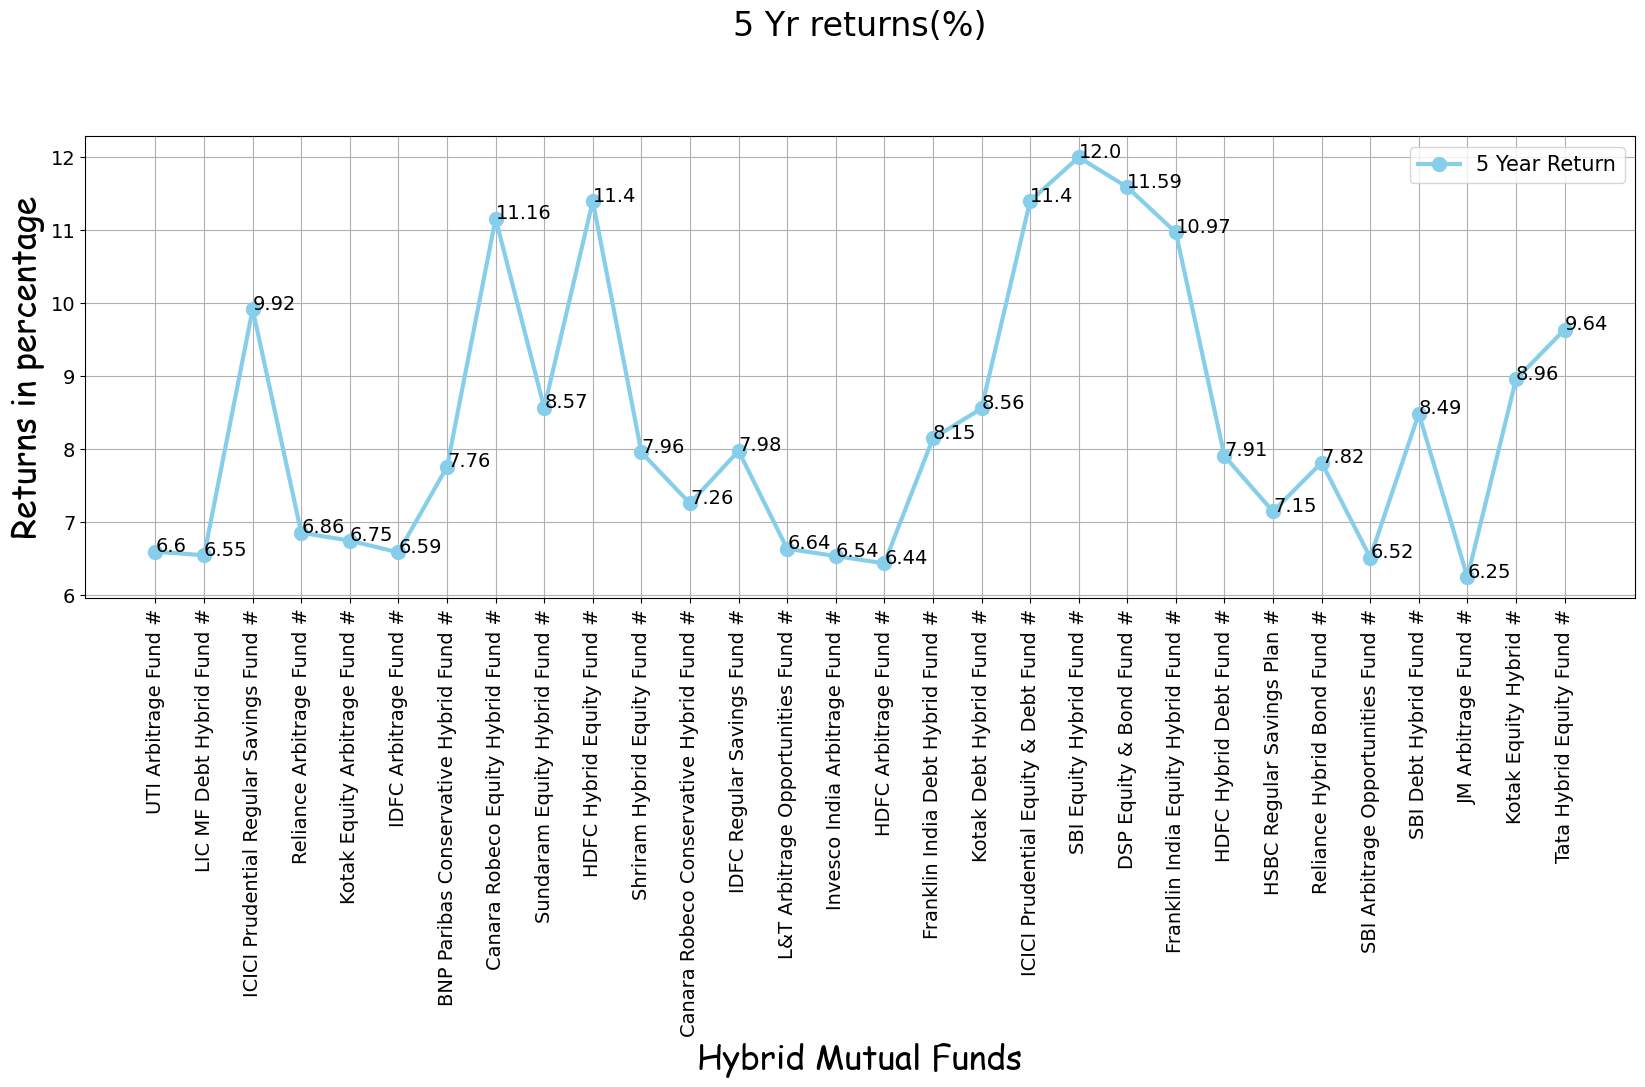

In [81]:
X=data['Fund_Scheme_Name']
Y=data['5_Yr_Return']

labels=['5 Year Return']
plt.plot(X, Y, linewidth='3.0', color='skyblue', marker='o', markersize='10')

plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.title('5 Yr returns(%)', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()

for i,j in zip(X,Y):
    plt.annotate(str(j),xy=(i,j))


plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

In [82]:
data.head()

Unnamed: 0  Sl_No.                         Fund_Scheme_Name       Category  \
0           0       1                     UTI Arbitrage Fund #      Arbitrage   
1           1       2                LIC MF Debt Hybrid Fund #  Conservative    
2           2       3  ICICI Prudential Regular Savings Fund #  Conservative    
3           3       4                Reliance Arbitrage Fund #      Arbitrage   
4           4       5            Kotak Equity Arbitrage Fund #      Arbitrage   

  Launch_Date Crisil_Rating  Net_Assets_(Cr)  1_Yr_Return  3_Yr_Return  \
0  2006-06-29        Rank 1          1397.70         6.52         6.24   
1  2003-06-02        Rank 1            84.93         7.68         5.92   
2  2004-03-30        Rank 1          1589.42         8.40         9.33   
3  2010-10-14        Rank 2          8535.00         6.64         6.41   
4  2005-09-29        Rank 2         13360.00         6.56         6.32   

   5_Yr_Return  ... Expense_Ratio  Sharpe_Ratio  Sortino_Ratio  Alpha  Beta  \
0         6.60  ...          0.83         -0.03          -0.04   0.60  0.33   
1         6.55  ...          2.30         -0.08          -0.12  -1.91  0.58   
2         9.92  ...          2.24          0.84           1.36   1.91  1.58   
3         6.86  ...          1.04          0.26           0.45   0.70  1.30   
4         6.75  ...          0.97          0.14           0.23   0.56  1.26   

   Std_Dev  R_Squared  Year_Trailing  Net_Return  Good  
0     0.45       0.00             13        7.40     0  
1     3.07      62.19             16        7.73     0  
2     3.57      88.45             15       10.06     1  
3     0.54      85.00              8       17.83     1  
4     0.45      87.45             13       18.45     1  

[5 rows x 21 columns]

### Comparing 1yr,3yr and 5 yr returns

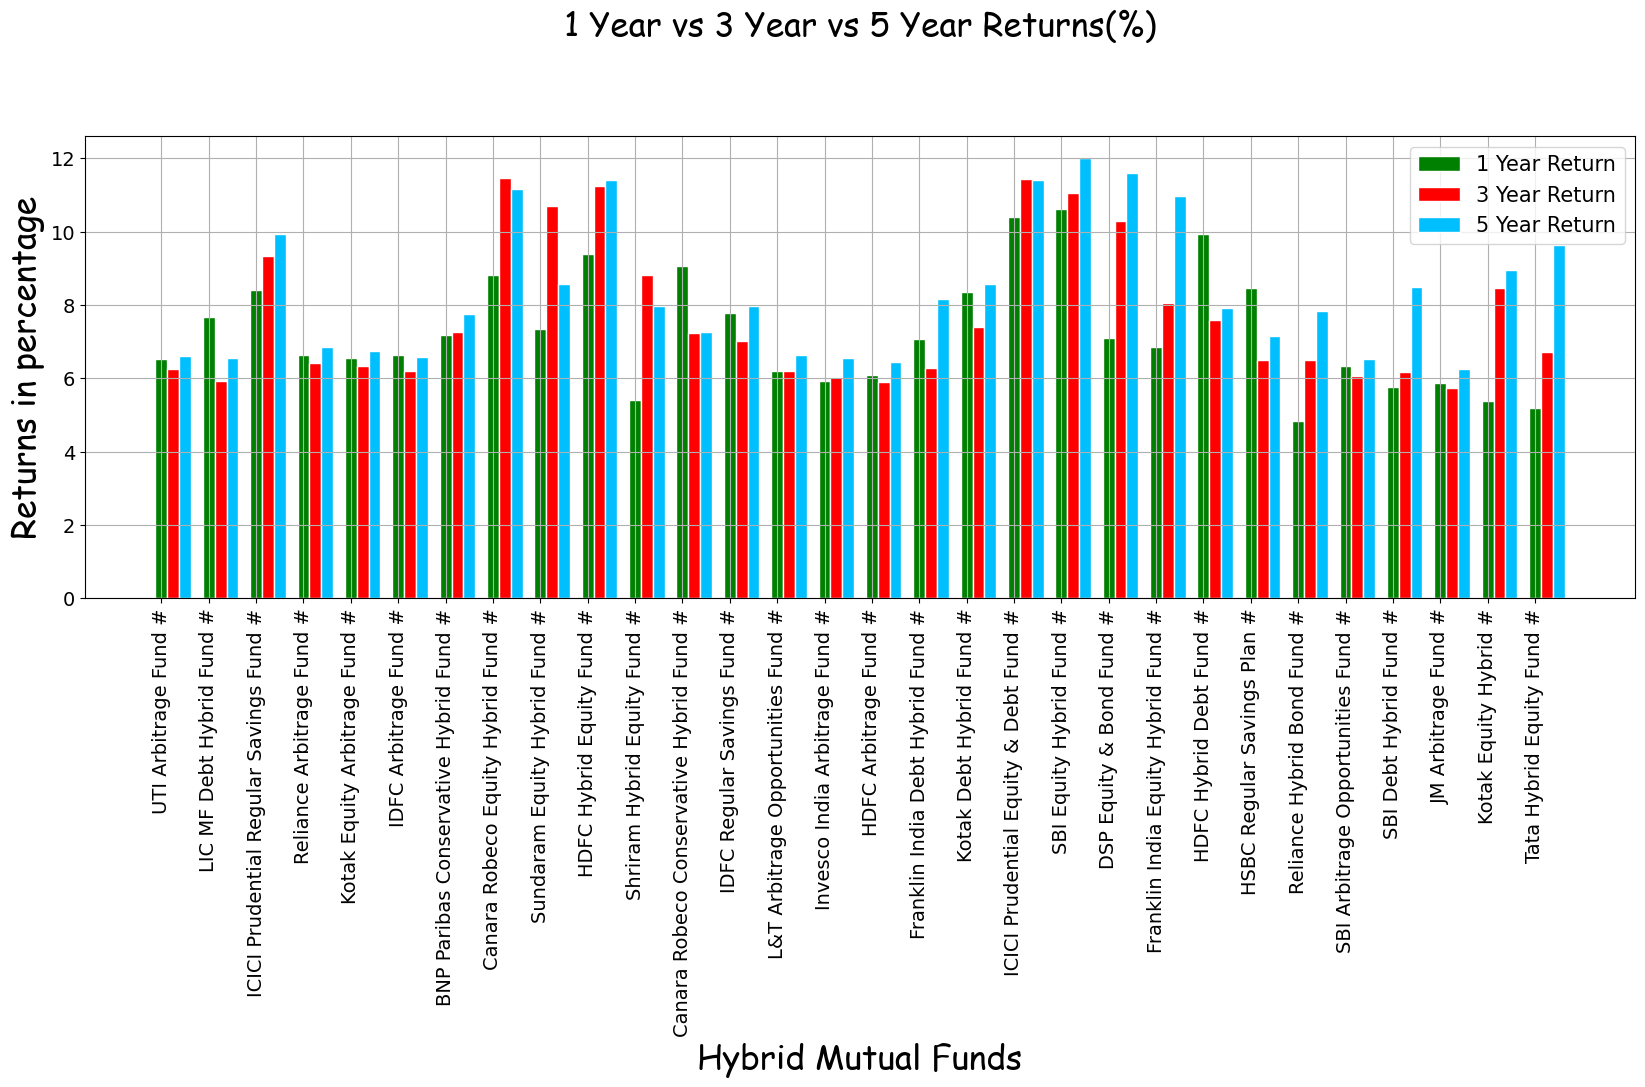

In [117]:
# Define bar width and labels
barwidth = 0.25
labels = ['1 Year Return', '3 Year Return', '5 Year Return']

# Data extraction
X = data['Fund_Scheme_Name']
Y1 = data['1_Yr_Return']
Y2 = data['3_Yr_Return']
Y3 = data['5_Yr_Return']

# Set position of bars and X axis
r1 = np.arange(len(Y1))
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]

# Create the grouped bar chart
plt.bar(r1, Y1, color='green', width=barwidth, edgecolor='white', label='1 Year Return')
plt.bar(r2, Y2, color='red', width=barwidth, edgecolor='white', label='3 Year Return')
plt.bar(r3, Y3, color='deepskyblue', width=barwidth, edgecolor='white', label='5 Year Return')

# Customize the plot add labels
plt.xlabel('Hybrid Mutual Funds', fontsize = 24, fontname = 'Comic Sans MS')
plt.ylabel('Returns in percentage', fontsize = 24, fontname = 'Comic Sans MS')
plt.xticks(r1, X,  rotation ='vertical');
plt.rcParams['figure.figsize'] = (20,6)
plt.rcParams['font.size'] = 14
plt.grid()
plt.title('1 Year vs 3 Year vs 5 Year Returns(%)',y=1.20,fontsize=24,fontname="Comic Sans MS")
plt.legend(labels, loc='upper right',bbox_to_anchor=(1.0,1.0),fontsize=15)

plt.show()

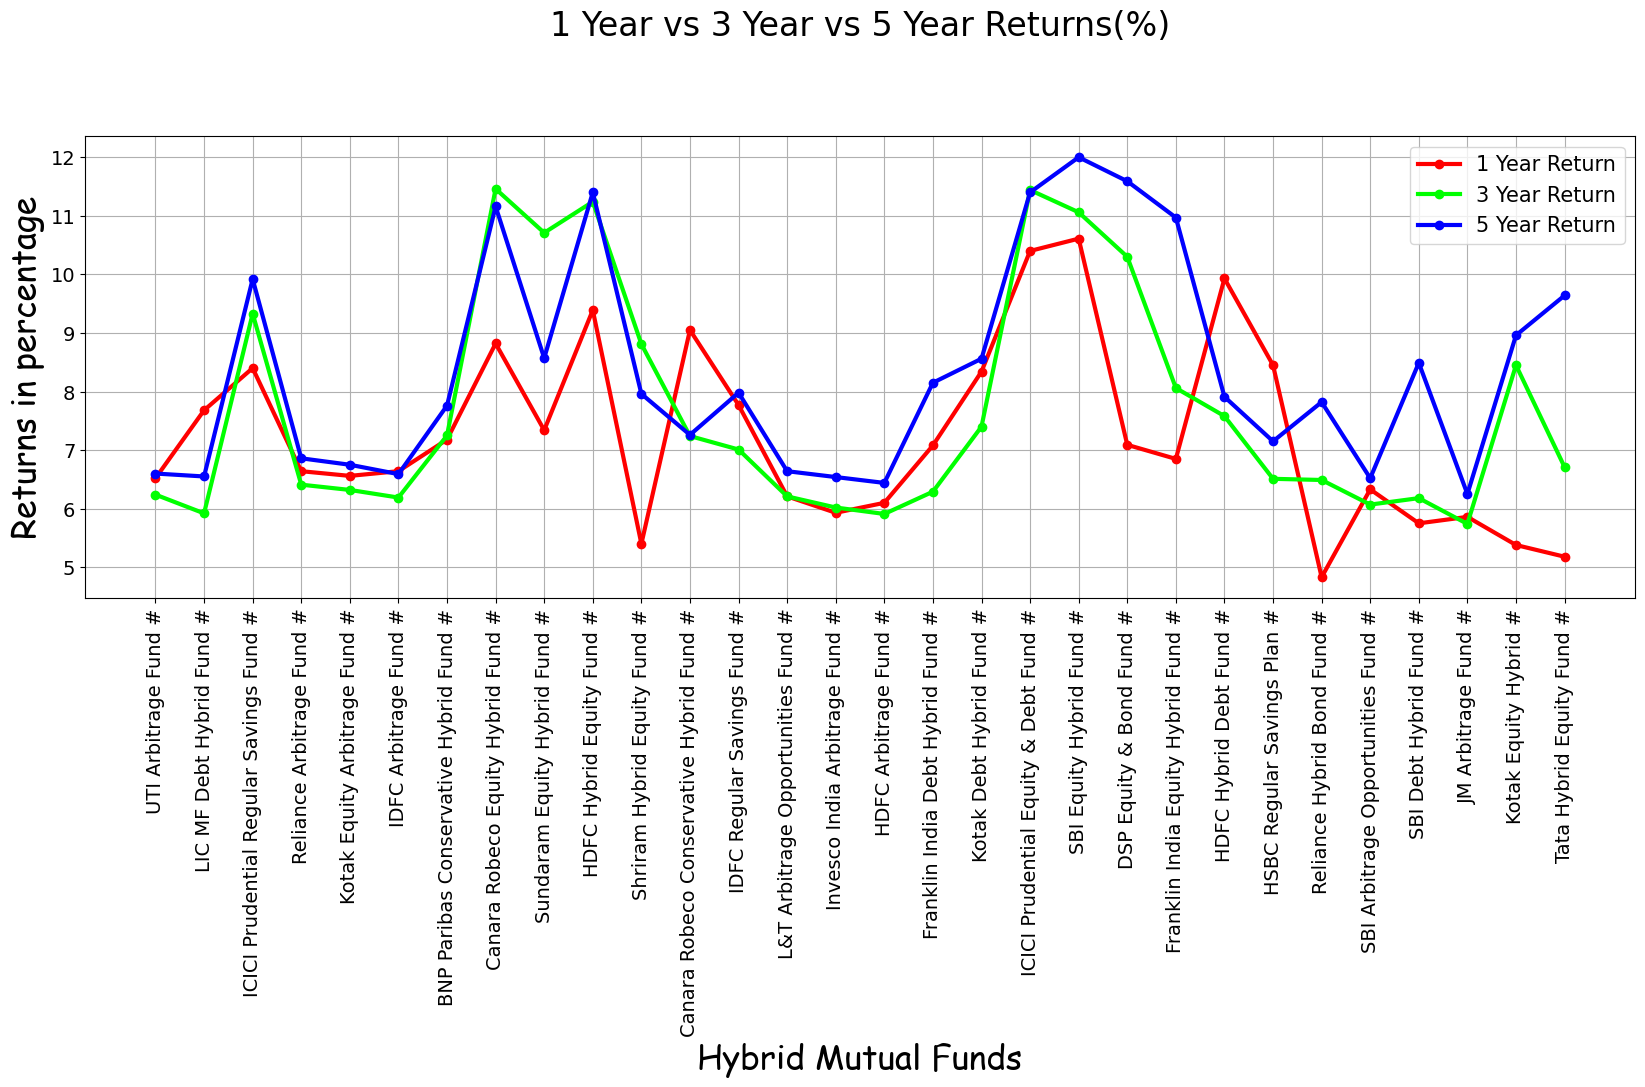

In [120]:

# Data extraction
X = data['Fund_Scheme_Name']
Y1 = data['1_Yr_Return']
Y2 = data['3_Yr_Return']
Y3 = data['5_Yr_Return']
labels = ['1 Year Return', '3 Year Return', '5 Year Return']

# Create line plots for each year
plt.plot(X, Y1, linewidth=3.0, color='red', marker='o', markersize=6, label='1 Year Return')
plt.plot(X, Y2, linewidth=3.0, color='lime', marker='o', markersize=6, label='3 Year Return')
plt.plot(X, Y3, linewidth=3.0, color='blue', marker='o', markersize=6, label='5 Year Return')

# Customize the plot
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS")
plt.title('1 Year vs 3 Year vs 5 Year Returns(%)', y=1.20, fontsize=24)
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.0, 1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()

# Customize figure size and font size
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14

# Display the plot
plt.show()


## Expense Ratio:

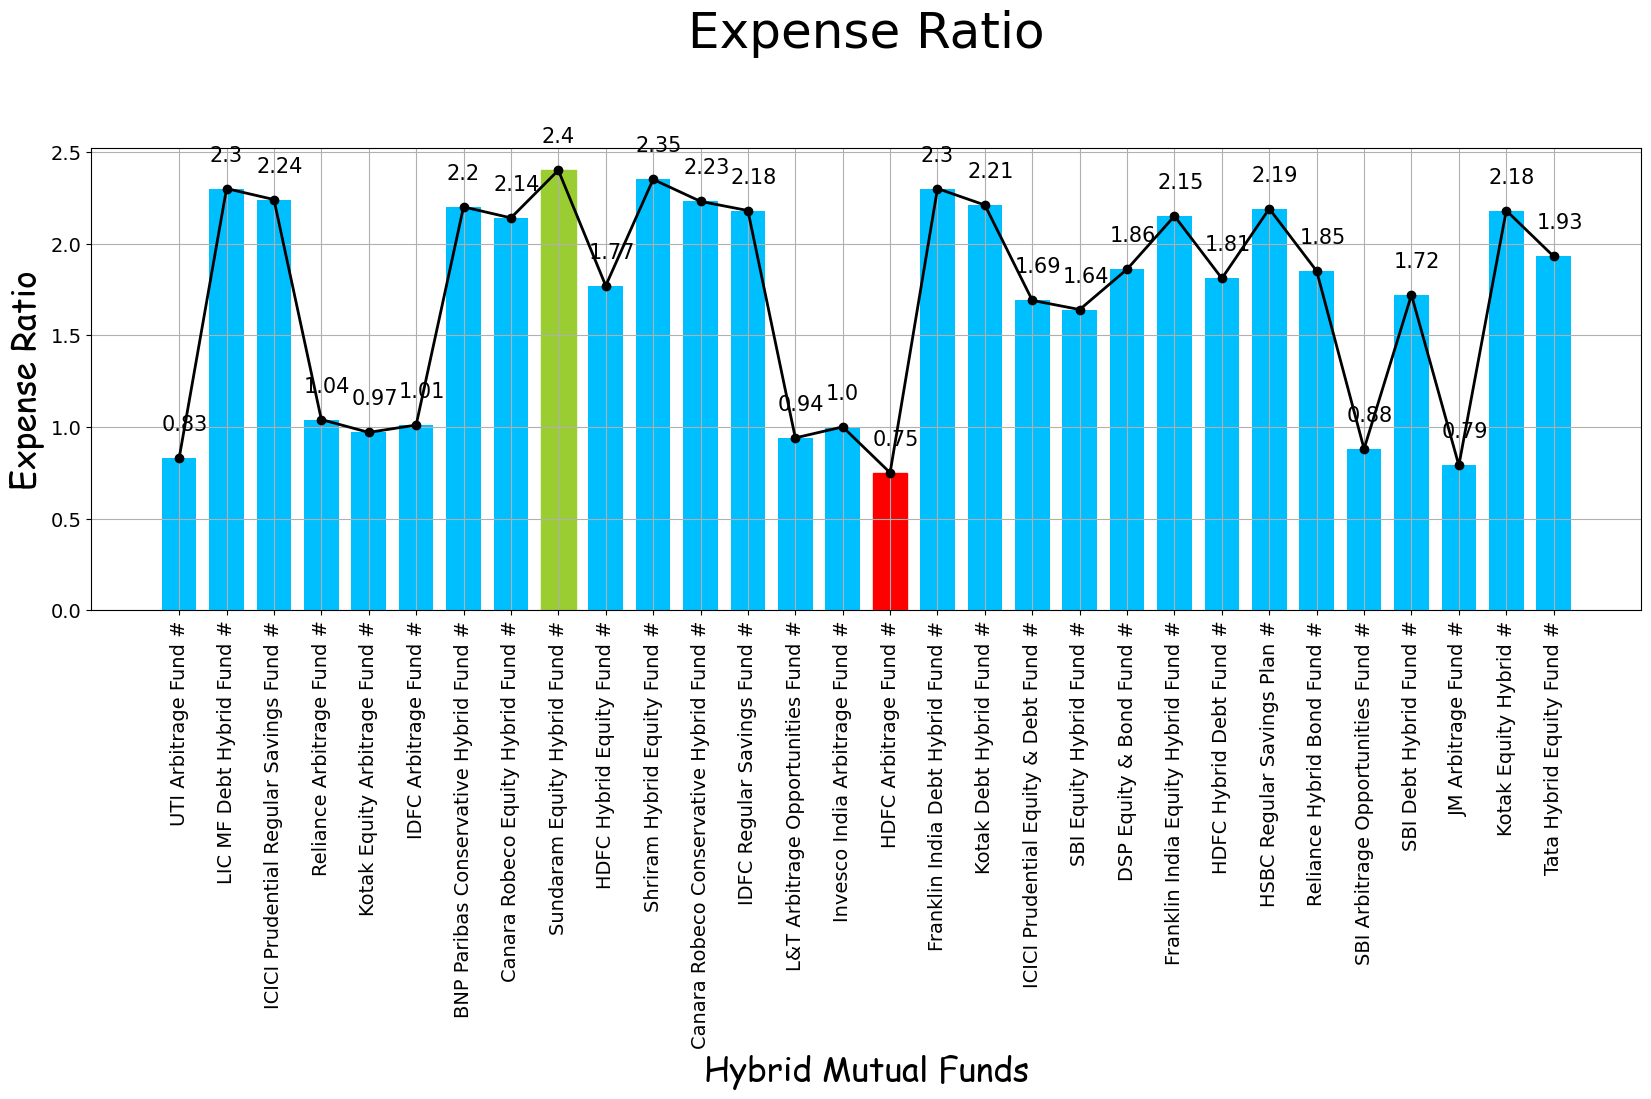

In [156]:
X = data['Fund_Scheme_Name']
Y = data['Expense_Ratio']

bars = plt.bar(X,Y, color = 'deepskyblue', width=0.73)

# finding max and minimum scheme according to expense ratio
bars[data['Expense_Ratio'].idxmin()].set_color('red')
bars[data['Expense_Ratio'].idxmax()].set_color('yellowgreen')

# plotting the line
plt.plot(X, Y, linewidth = '2.0', color ='black', marker = 'o', markersize = 6);

# Customizing the name
plt.xlabel('Hybrid Mutual Funds', fontsize =24, fontname = 'Comic Sans MS');
plt.ylabel('Expense Ratio', fontsize =24, fontname = 'Comic Sans MS');

# Adding the grid
plt.grid()

# Rotation
plt.xticks(X,rotation = 'vertical');

#Adding the title
plt.title("Expense Ratio", y=1.20,fontsize = 36)

# Adding the value of expense ratio on top of bar for seperate scemes

for bar in bars:
    y_val = bar.get_height()
    plt.text(bar.get_x(), y_val+0.15, y_val, fontsize=15)

#    matplotlib.pyplot.text(x, y, s, fontdict=None, **kwargs)
#    x - x axis
#    y - y axis
#    s - text

# get_x() function retrieves the x-coordinate of the bar,
# y_val is the numerical value displayed as text just above the respective bar.

plt.show()

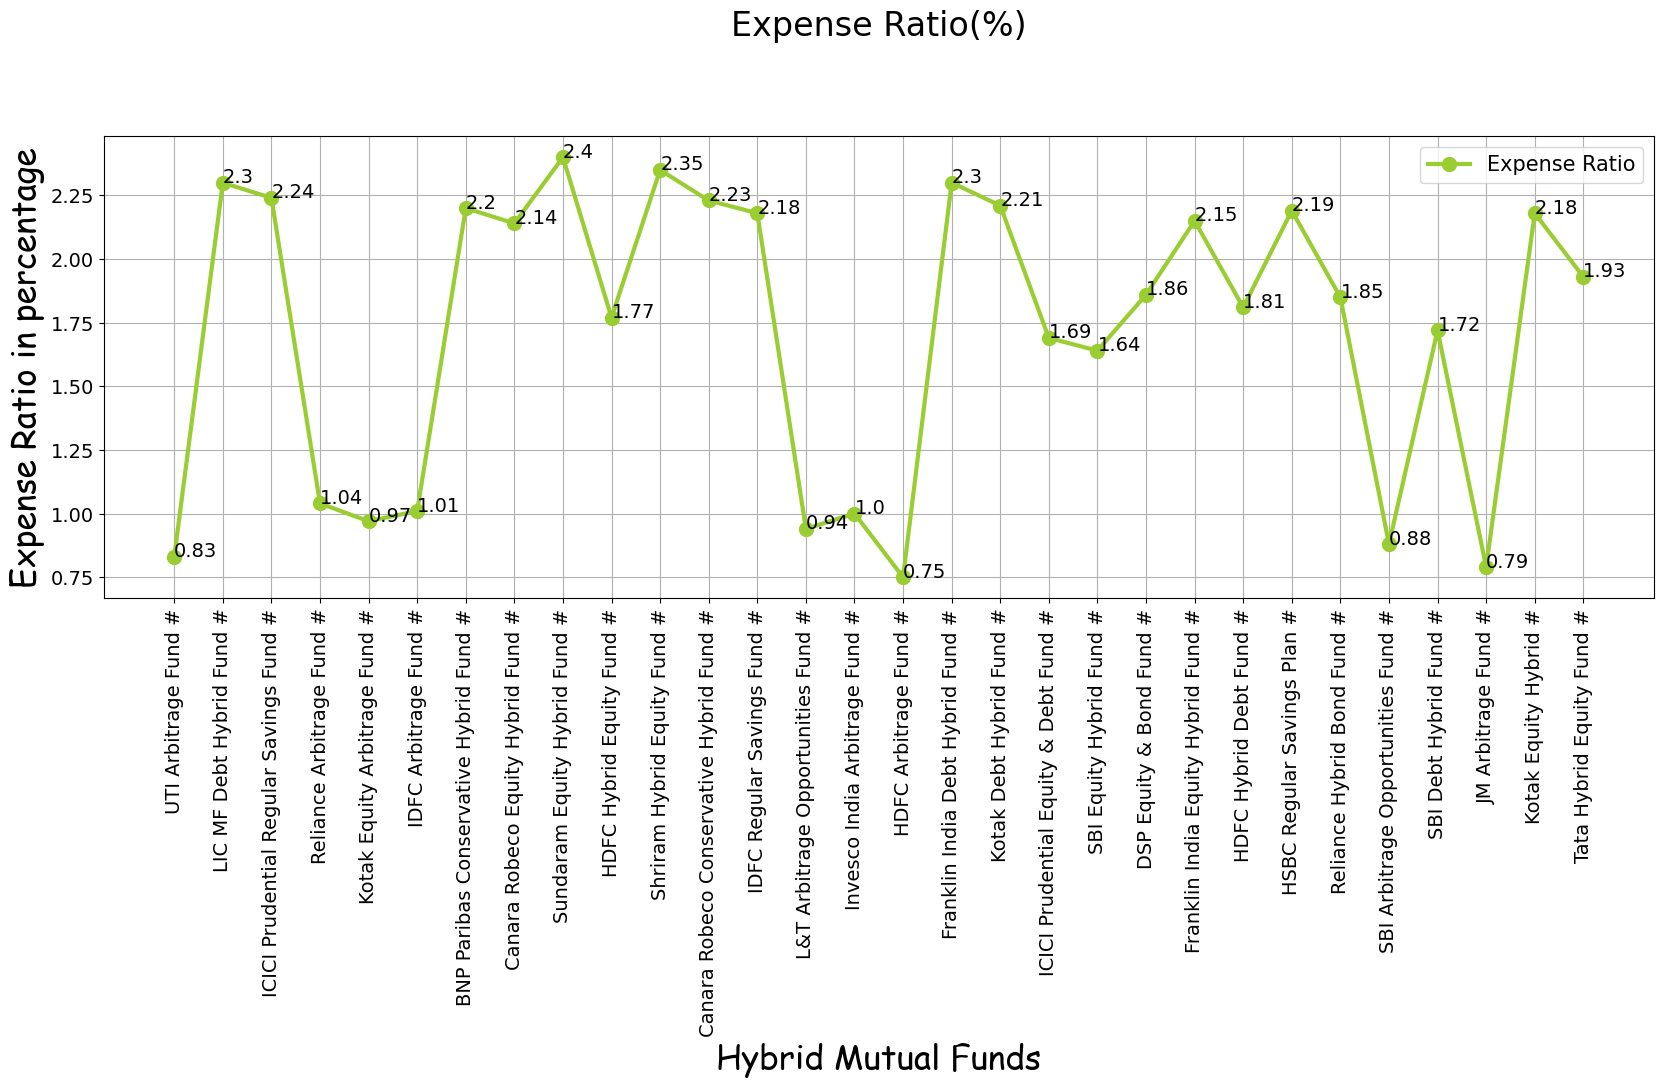

In [157]:
X=data['Fund_Scheme_Name']
Y=data['Expense_Ratio']

labels=['Expense Ratio']
lines=plt.plot(X, Y, linewidth='3.0', color='yellowgreen', marker='o', markersize='10')

plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Expense Ratio in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.title('Expense Ratio(%)', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()

for i,j in zip(X,Y):
    plt.annotate(str(j),xy=(i,j))


plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()


### Sharp Ratio

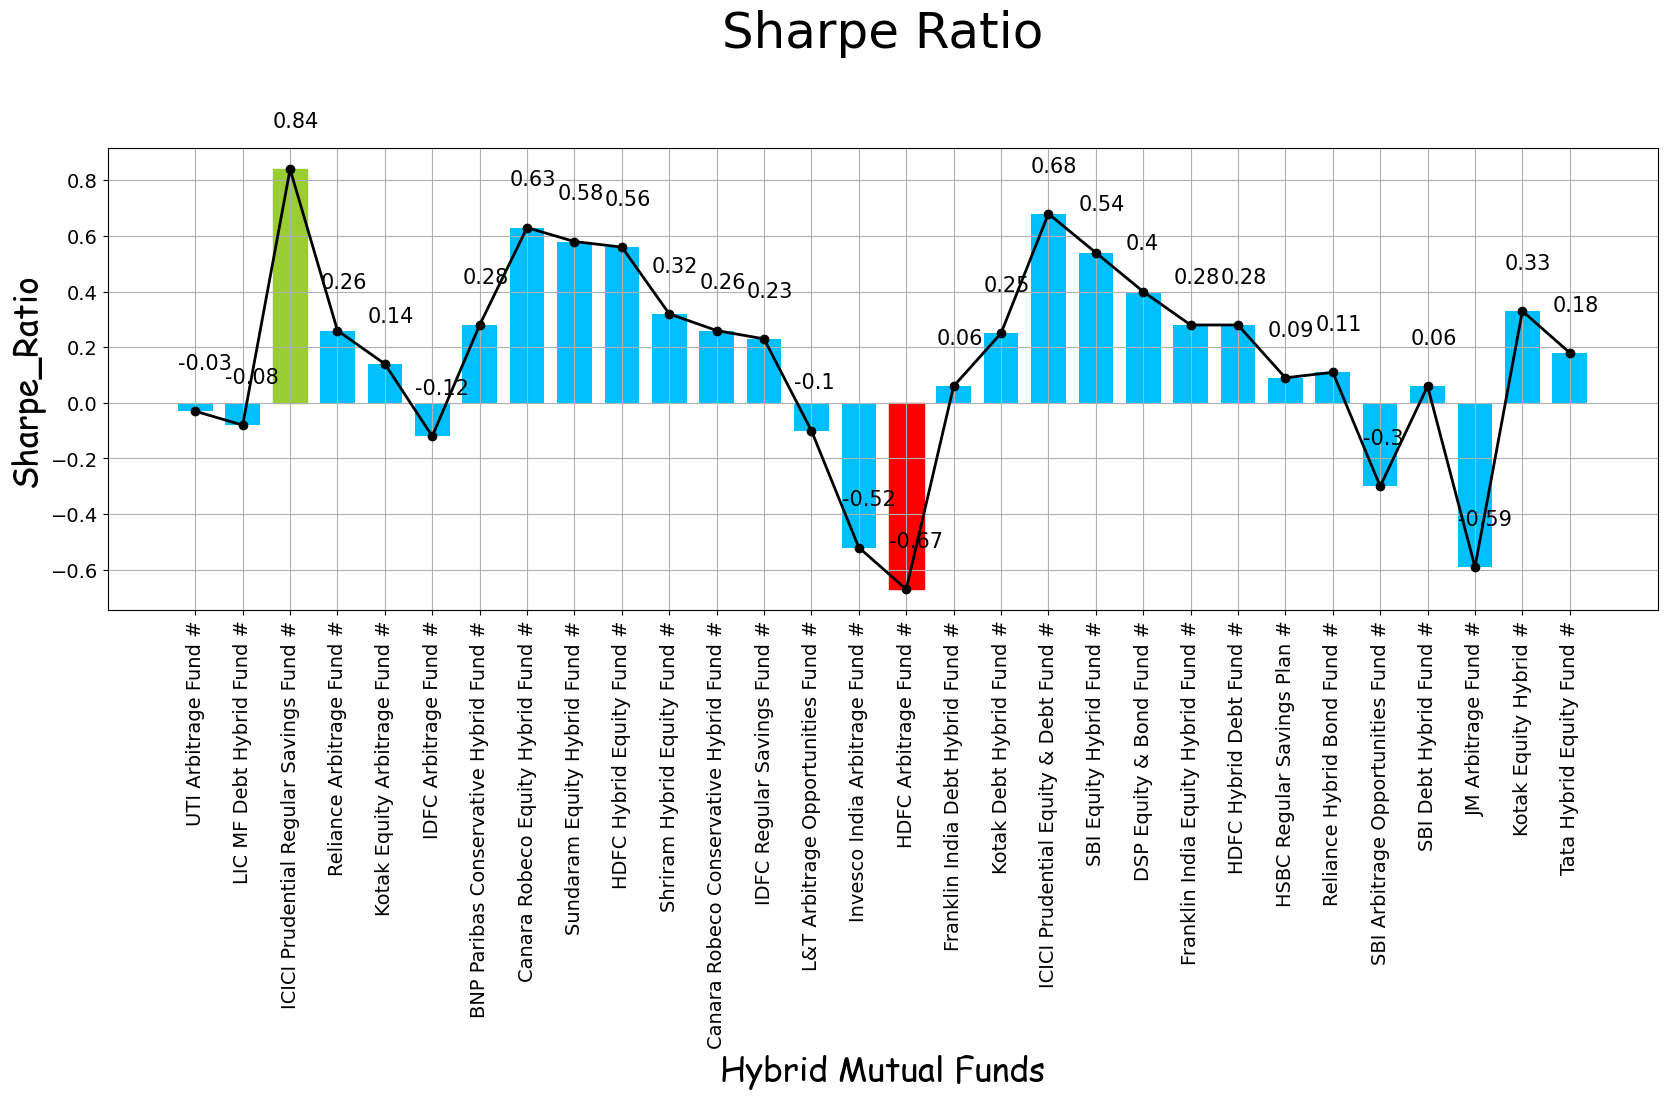

In [162]:
X = data['Fund_Scheme_Name']
Y = data['Sharpe_Ratio']

bars = plt.bar(X,Y, color = 'deepskyblue', width=0.73)

# finding max and minimum scheme according to expense ratio
bars[data['Sharpe_Ratio'].idxmin()].set_color('red')
bars[data['Sharpe_Ratio'].idxmax()].set_color('yellowgreen')

# plotting the line
plt.plot(X, Y, linewidth = '2.0', color ='black', marker = 'o', markersize = 6);

# Customizing the name
plt.xlabel('Hybrid Mutual Funds', fontsize =24, fontname = 'Comic Sans MS');
plt.ylabel('Sharpe_Ratio', fontsize =24, fontname = 'Comic Sans MS');

# Adding the grid
plt.grid()

# Rotation
plt.xticks(X,rotation = 'vertical');

#Adding the title
plt.title("Sharpe Ratio", y=1.20,fontsize = 36)

# Adding the value of expense ratio on top of bar for seperate scemes

for bar in bars:
    y_val = bar.get_height()
    plt.text(bar.get_x(), y_val+0.15, y_val, fontsize=15)

#    matplotlib.pyplot.text(x, y, s, fontdict=None, **kwargs)
#    x - x axis
#    y - y axis
#    s - text

# get_x() function retrieves the x-coordinate of the bar,
# y_val is the numerical value displayed as text just above the respective bar.

plt.show()

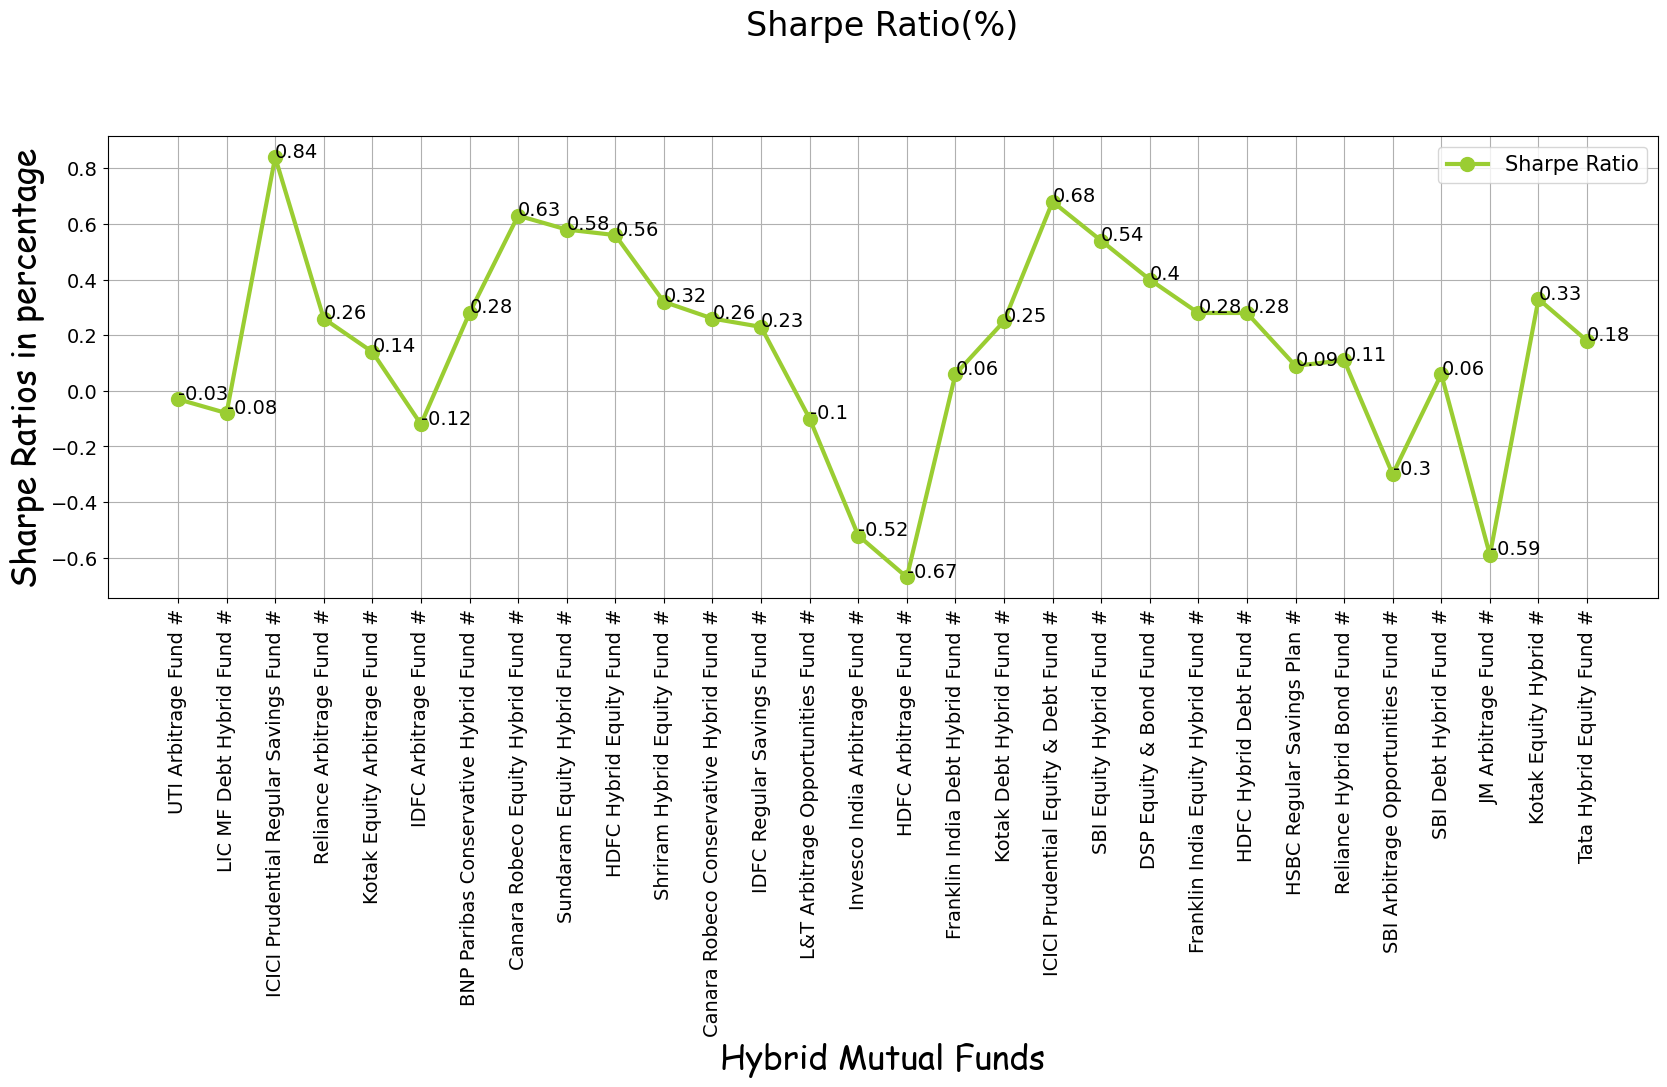

In [164]:
X=data['Fund_Scheme_Name']
Y=data['Sharpe_Ratio']

labels=['Sharpe Ratio']
lines=plt.plot(X, Y, linewidth='3.0', color='yellowgreen', marker='o', markersize='10')

plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Sharpe Ratios in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.title('Sharpe Ratio(%)', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()

for i,j in zip(X,Y):
    plt.annotate(str(j),xy=(i,j))


plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

### Sortino Ratio

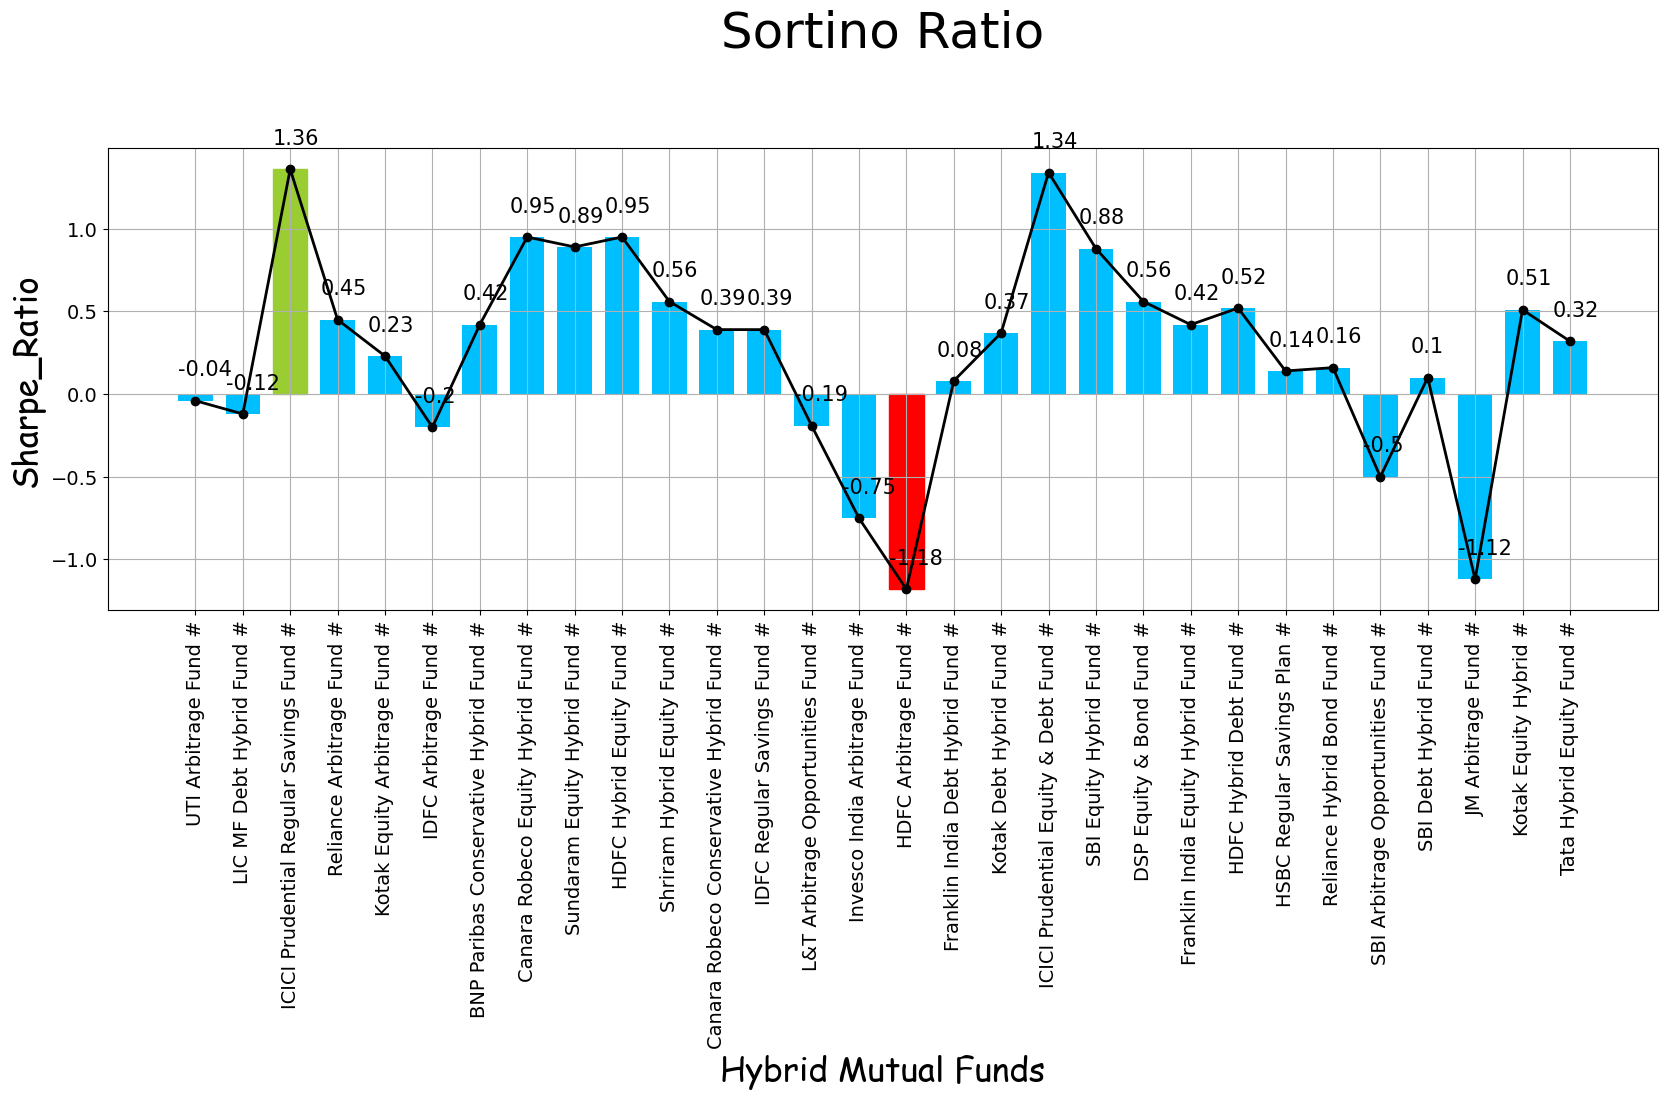

In [166]:
X = data['Fund_Scheme_Name']
Y = data['Sortino_Ratio']

bars = plt.bar(X,Y, color = 'deepskyblue', width=0.73)

# finding max and minimum scheme according to expense ratio
bars[data['Sortino_Ratio'].idxmin()].set_color('red')
bars[data['Sortino_Ratio'].idxmax()].set_color('yellowgreen')

# plotting the line
plt.plot(X, Y, linewidth = '2.0', color ='black', marker = 'o', markersize = 6);

# Customizing the name
plt.xlabel('Hybrid Mutual Funds', fontsize =24, fontname = 'Comic Sans MS');
plt.ylabel('Sharpe_Ratio', fontsize =24, fontname = 'Comic Sans MS');

# Adding the grid
plt.grid()

# Rotation
plt.xticks(X,rotation = 'vertical');

#Adding the title
plt.title("Sortino Ratio", y=1.20,fontsize = 36)

# Adding the value of expense ratio on top of bar for seperate scemes

for bar in bars:
    y_val = bar.get_height()
    plt.text(bar.get_x(), y_val+0.15, y_val, fontsize=15)

#    matplotlib.pyplot.text(x, y, s, fontdict=None, **kwargs)
#    x - x axis
#    y - y axis
#    s - text

# get_x() function retrieves the x-coordinate of the bar,
# y_val is the numerical value displayed as text just above the respective bar.

plt.show()

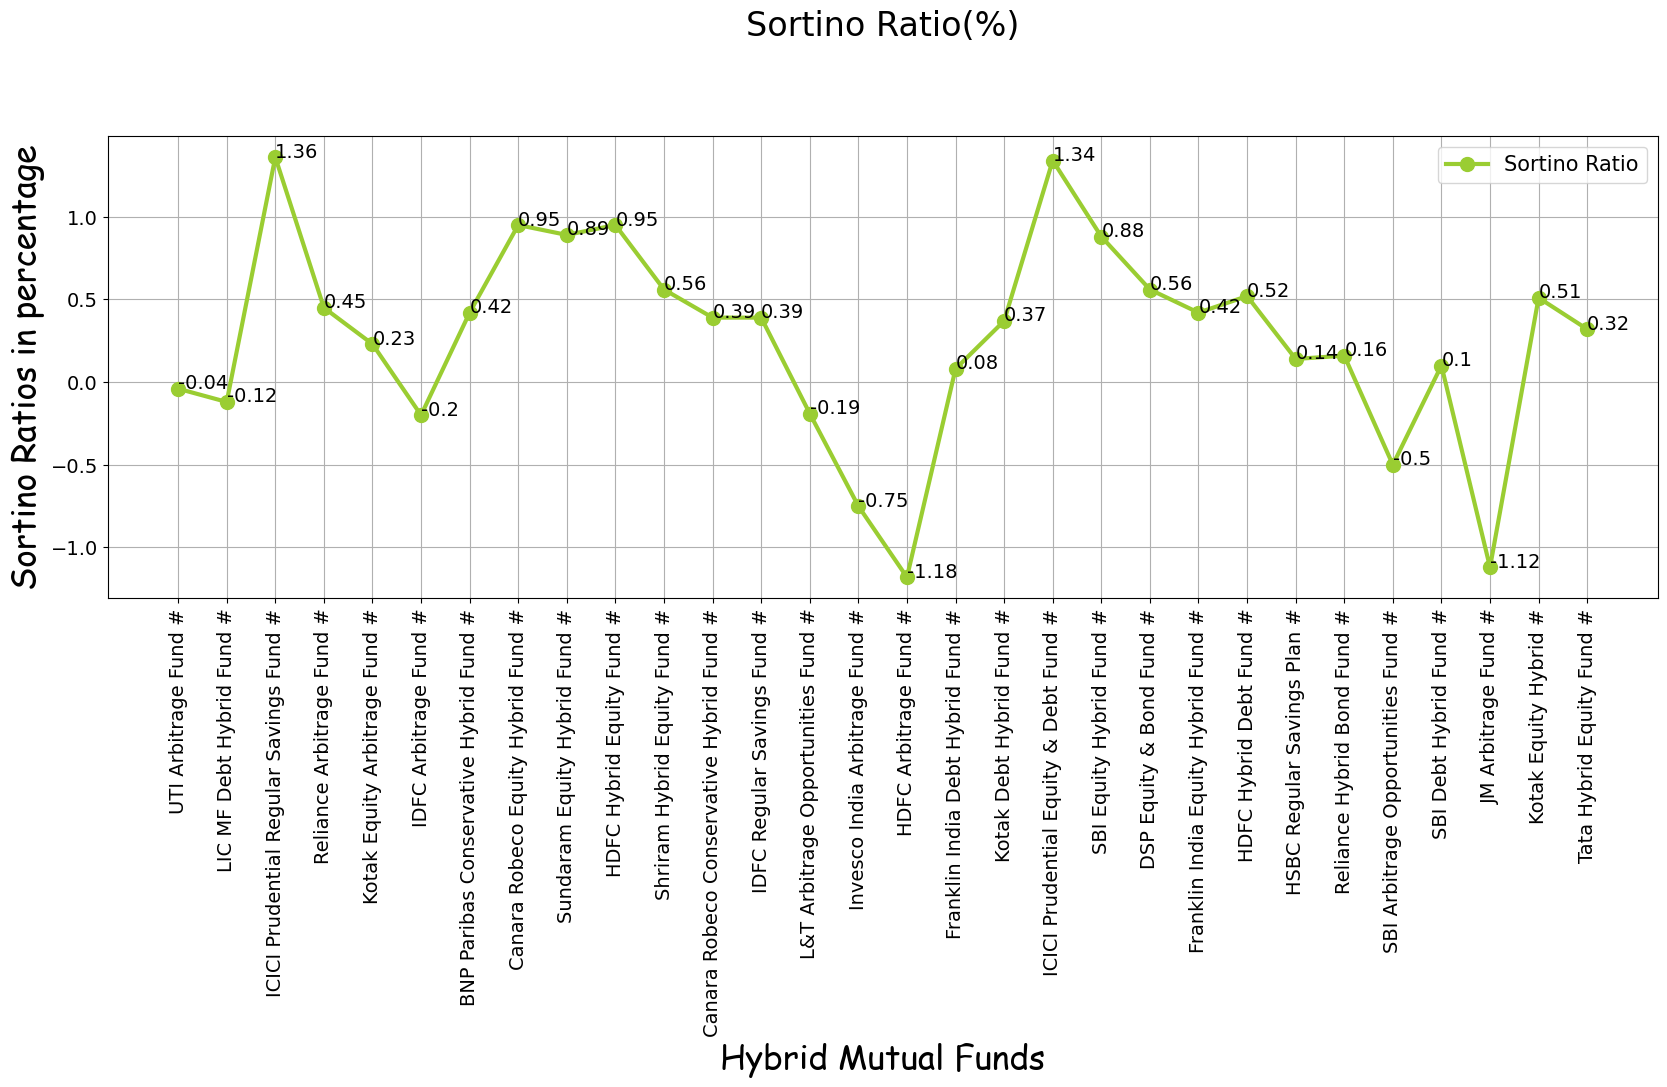

In [171]:
X=data['Fund_Scheme_Name']
Y=data['Sortino_Ratio']

labels=['Sortino Ratio']
lines=plt.plot(X, Y, linewidth='3.0', color='yellowgreen', marker='o', markersize='10')

plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Sortino Ratios in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.title('Sortino Ratio(%)', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()

for i,j in zip(X,Y):
    plt.annotate(str(j),xy=(i,j))


plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

### Compare the funds name with all other params , here we didnt compare it with alphas, beta, standard deviation and others🚨🚨

### Net Return

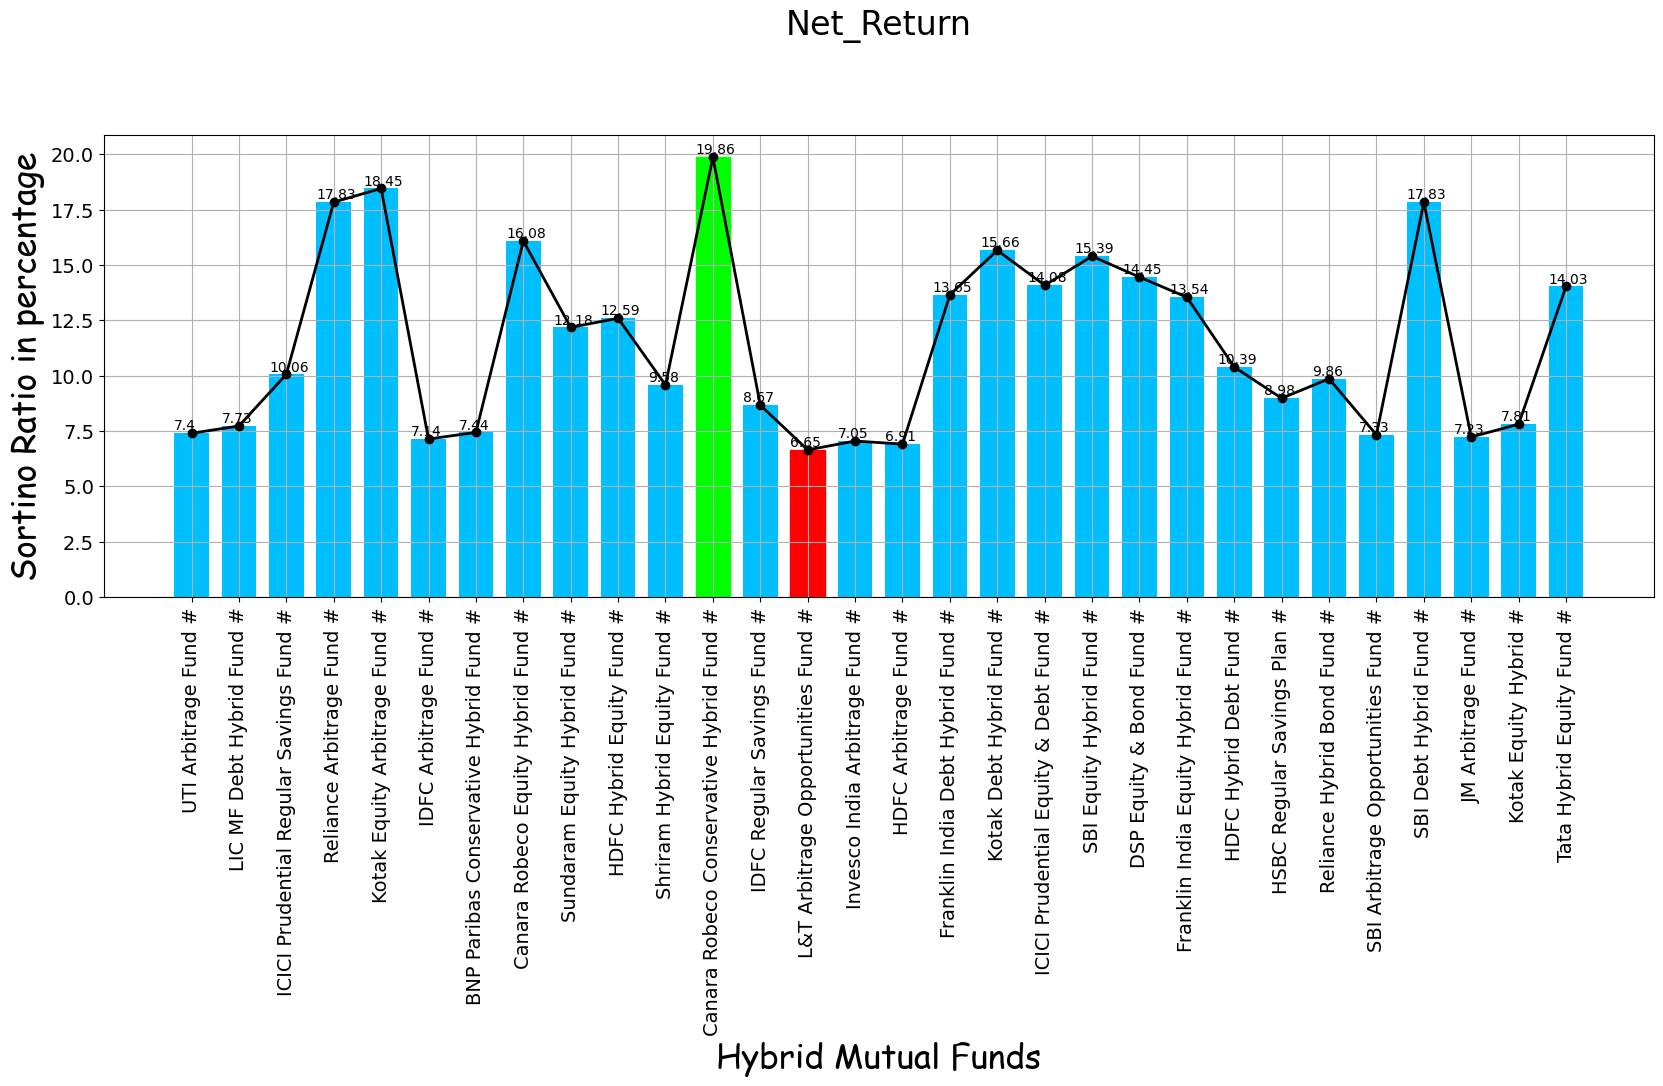

In [172]:
Y=data['Net_Return']
#Y.head(5)

bars = plt.bar(X,Y, color='deepskyblue', width=0.73)
bars[data['Net_Return'].idxmin()].set_color('red')
bars[data['Net_Return'].idxmax()].set_color('lime')
plt.plot(X, Y, linewidth='2.0', color='black', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Sortino Ratio in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Net_Return', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

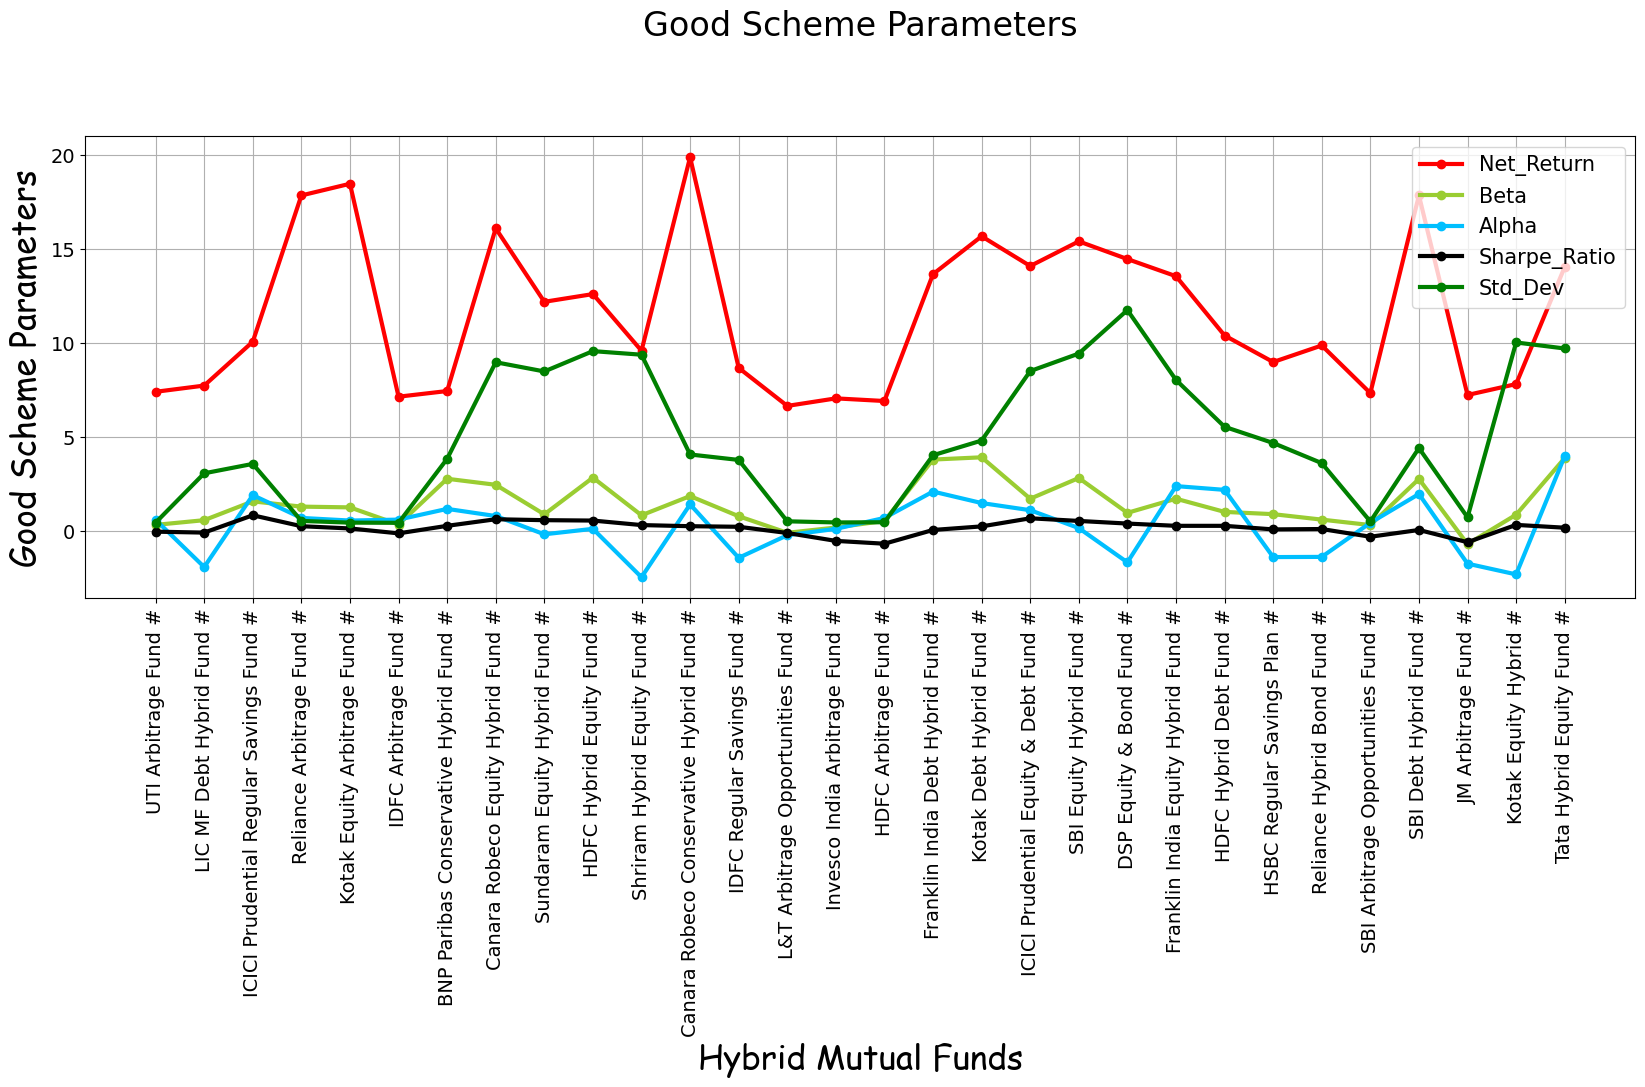

In [174]:

# Data extraction
X = data['Fund_Scheme_Name']
Y2 = data['Net_Return']
Y3 = data['Beta']
Y4 = data['Alpha']
Y5 = data['Sharpe_Ratio']
Y6 = data['Std_Dev']
labels = ['Net_Return', 'Beta', 'Alpha', 'Sharpe_Ratio', 'Std_Dev']

# Create line plots for each good scheme parameter
plt.plot(X, Y2, linewidth=3.0, color='red', marker='o', markersize=6, label='Net_Return')
plt.plot(X, Y3, linewidth=3.0, color='yellowgreen', marker='o', markersize=6, label='Beta')
plt.plot(X, Y4, linewidth=3.0, color='deepskyblue', marker='o', markersize=6, label='Alpha')
plt.plot(X, Y5, linewidth=3.0, color='black', marker='o', markersize=6, label='Sharpe_Ratio')
plt.plot(X, Y6, linewidth=3.0, color='green', marker='o', markersize=6, label='Std_Dev')

# Customize the plot
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Good Scheme Parameters', fontsize=24, fontname="Comic Sans MS")
plt.title('Good Scheme Parameters', y=1.20, fontsize=24)
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.0, 1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()

# Customize figure size and font size
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14

# Display the plot
plt.show()


### Now lets distinguish Good and bad schemes

Based on the score earn by r_squared, standard_deviation, aplha, beta, net_return,sharp ratio

for this we will take out median and then if the value is above the barrier value then only its good schemes

In [213]:
# Finding median of the values

def score(paramter_name,value):
    median_value = np.median(value)
    print(f'{paramter_name} : {median_value}')

score('Alpha',data['Alpha'])
score('Beta',data['Beta'])
score('R_Squeared',data['R_Squared'])
score('Net_Return',data['Net_Return'])
score('Std_Dev',data['Std_Dev'])
score('Sharpe_Ratio',data['Sharpe_Ratio'])

Alpha : 0.5800000000000001
Beta : 0.995
R_Squeared : 85.05
Net_Return : 10.225000000000001
Std_Dev : 4.050000000000001
Sharpe_Ratio : 0.24


### Distinguished between Good and bad schemes

For determining best parameter lets take help of .corr() coorelation function and also read some insights also of parameter and then only decide


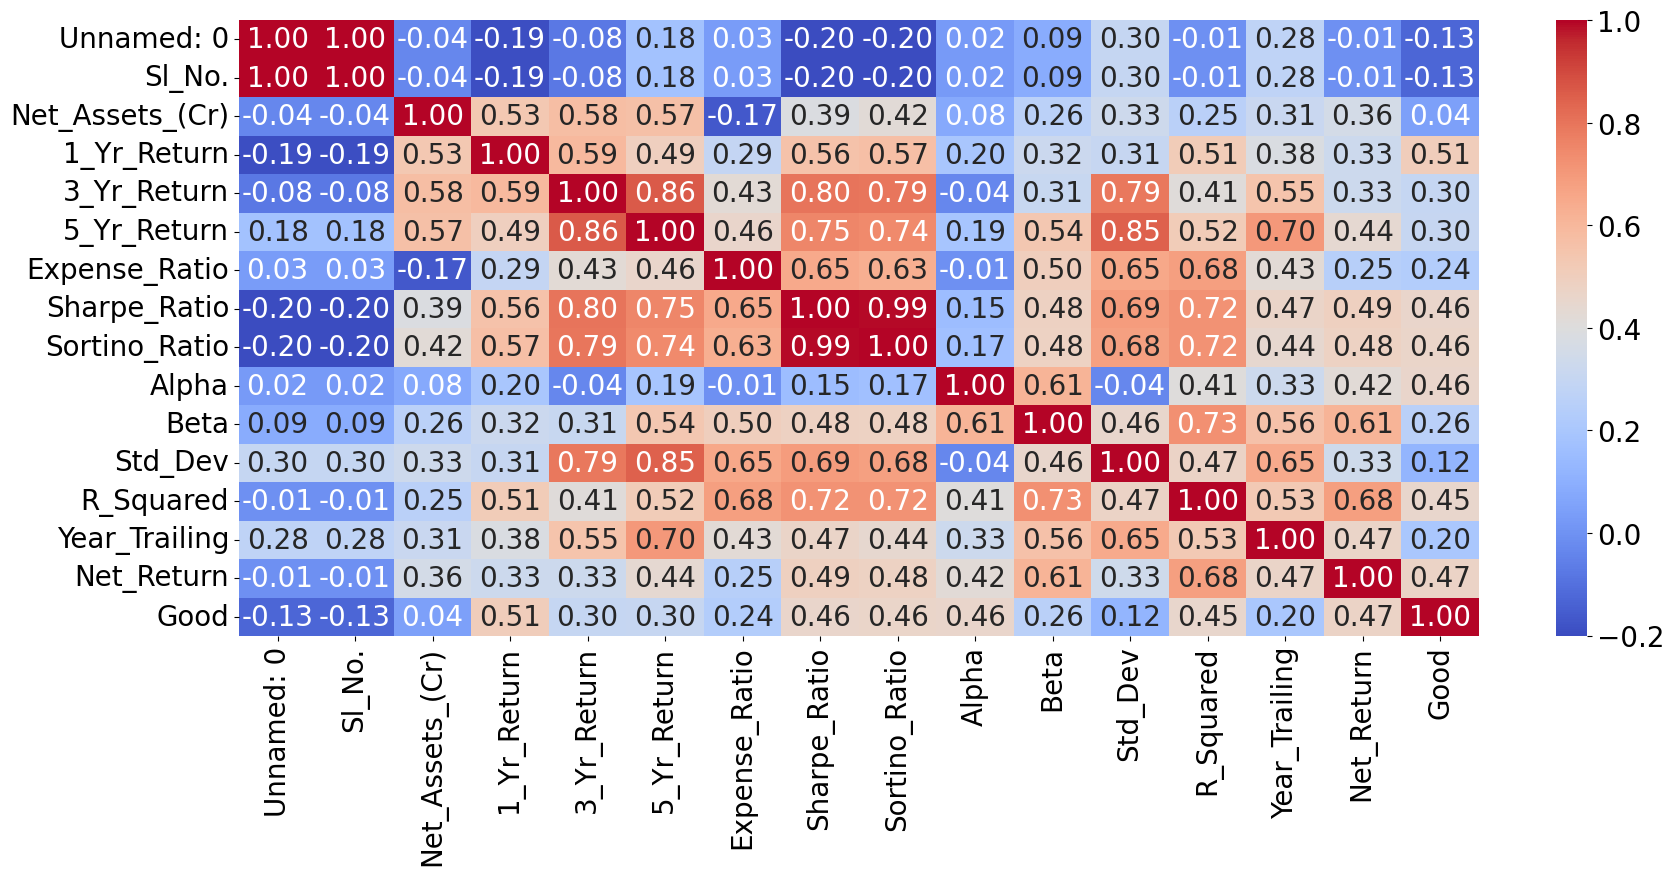

In [228]:
# Here we are taking threshold near 0.5 in respect for good so
correlation_matrix = data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(20, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


### 1) Based on R-squared


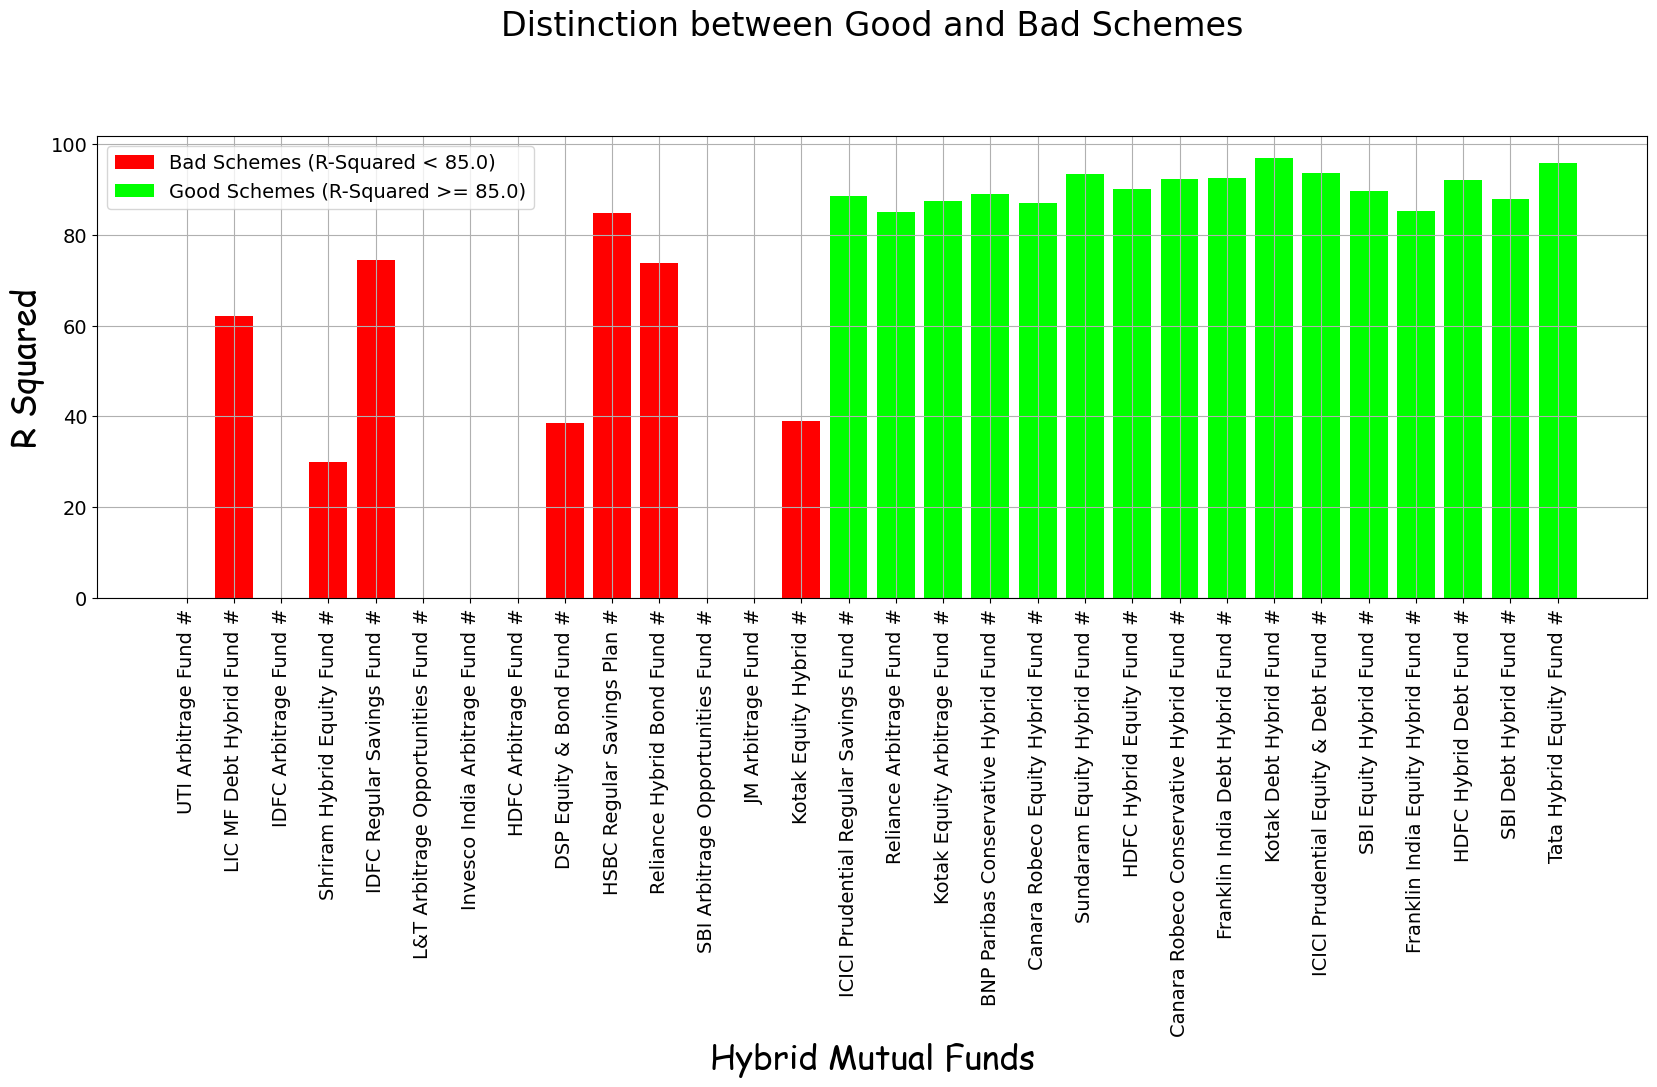

In [190]:

# Data extraction
X = data['Fund_Scheme_Name']
Y = data['R_Squared']

# Create masks based on R-squared values
mask1 = Y < 85.0   # R-squared values less than 85.0
mask2 = Y >= 85.0   # R-squared values greater than or equal to 85.0

# Create the bar plot for "good" and "bad" schemes
plt.bar(X[mask1], Y[mask1], color='red', label='Bad Schemes (R-Squared < 85.0)')
plt.bar(X[mask2], Y[mask2], color='lime', label='Good Schemes (R-Squared >= 85.0)')

# Customize the plot
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('R Squared', fontsize=24, fontname="Comic Sans MS")
plt.title('Distinction between Good and Bad Schemes', y=1.20, fontsize=24)
plt.xticks(X, rotation='vertical')
plt.grid()

# Customize figure size and font size
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14

# Display the plot
plt.legend()
plt.show()


### 2) Based on Net-Returns

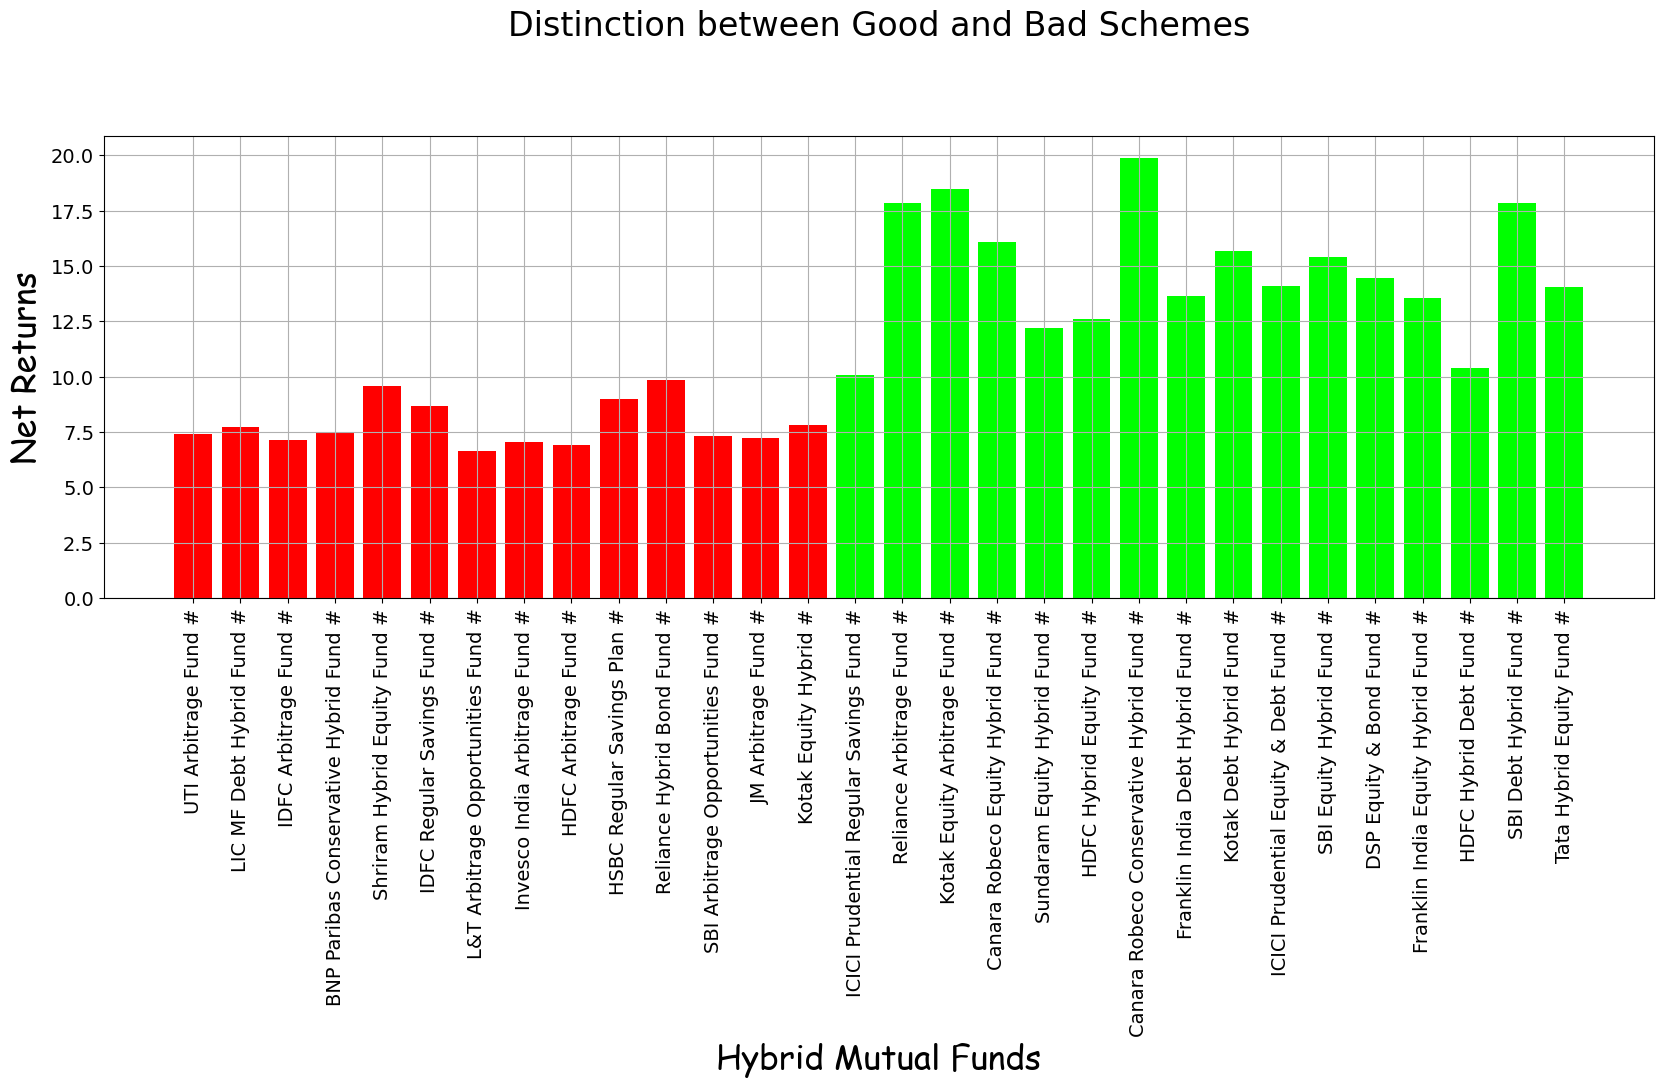

In [191]:
X = data['Fund_Scheme_Name']
Y = data['Net_Return']

mask1 = Y < 10.0
mask2 = Y >= 10.0

plt.bar(X[mask1], Y[mask1], color = 'red')
plt.bar(X[mask2], Y[mask2], color = 'lime')

plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Net Returns', fontsize=24, fontname="Comic Sans MS" )

plt.grid()
plt.title('Distinction between Good and Bad Schemes', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')

plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

plt.show()

### 3) Based on Beta value:

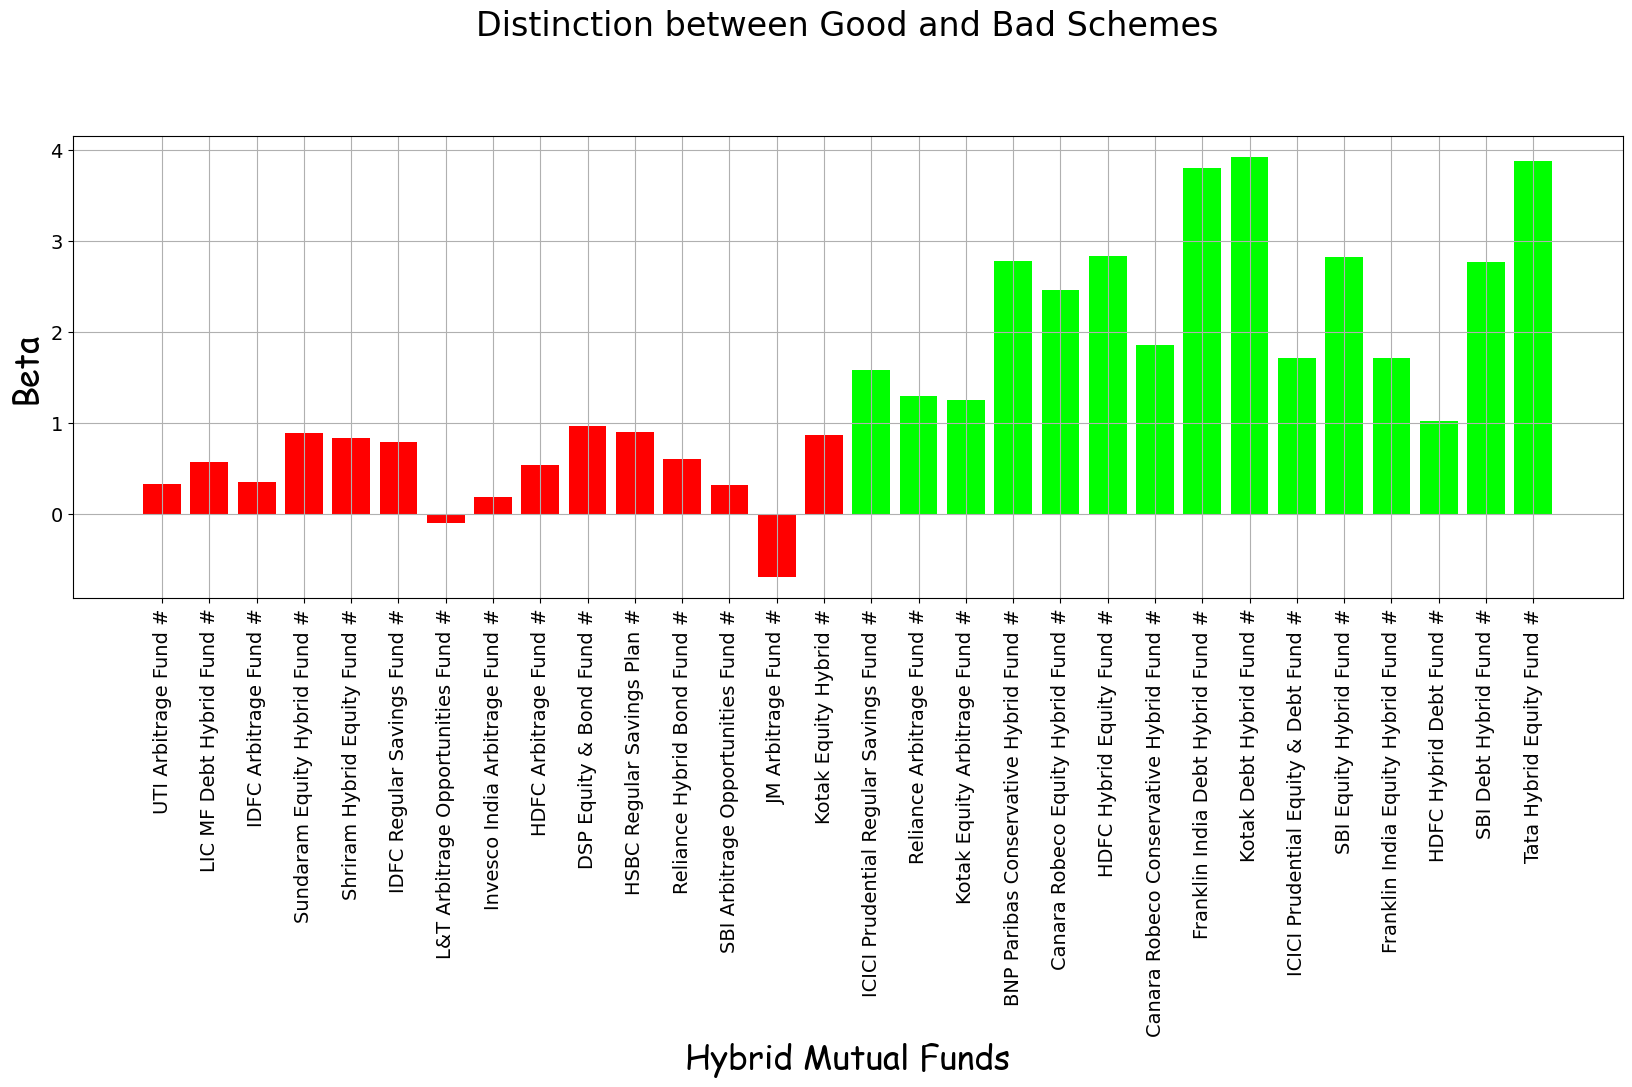

In [192]:
X = data['Fund_Scheme_Name']
Y = data['Beta']

mask1 = Y < 0.995
mask2 = Y >= 0.995

plt.bar(X[mask1], Y[mask1], color = 'red')
plt.bar(X[mask2], Y[mask2], color = 'lime')

plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Beta', fontsize=24, fontname="Comic Sans MS" )
plt.grid()

plt.title('Distinction between Good and Bad Schemes', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')

plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

plt.show()

### 4) Alpha

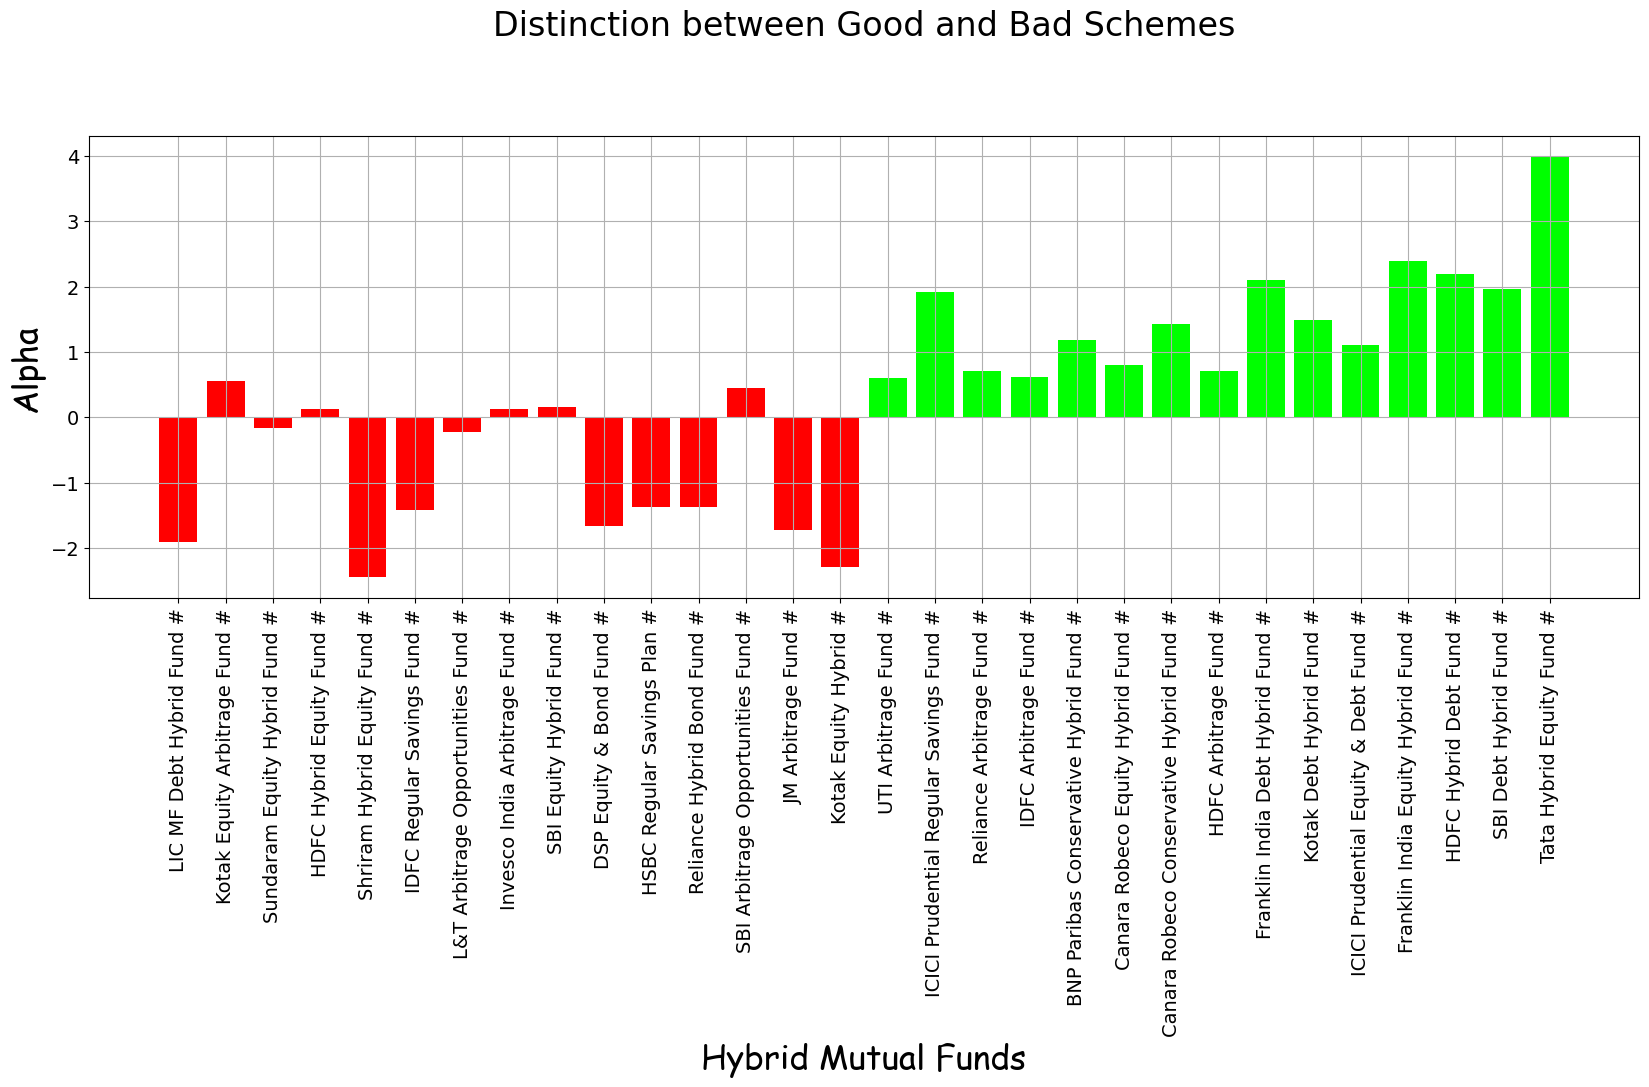

In [195]:
X = data['Fund_Scheme_Name']
Y = data['Alpha']

mask1 = Y < .58
mask2 = Y >= .58

plt.bar(X[mask1], Y[mask1], color = 'red')
plt.bar(X[mask2], Y[mask2], color = 'lime')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Alpha', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Distinction between Good and Bad Schemes', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()


### 5) Sharpe Ratio

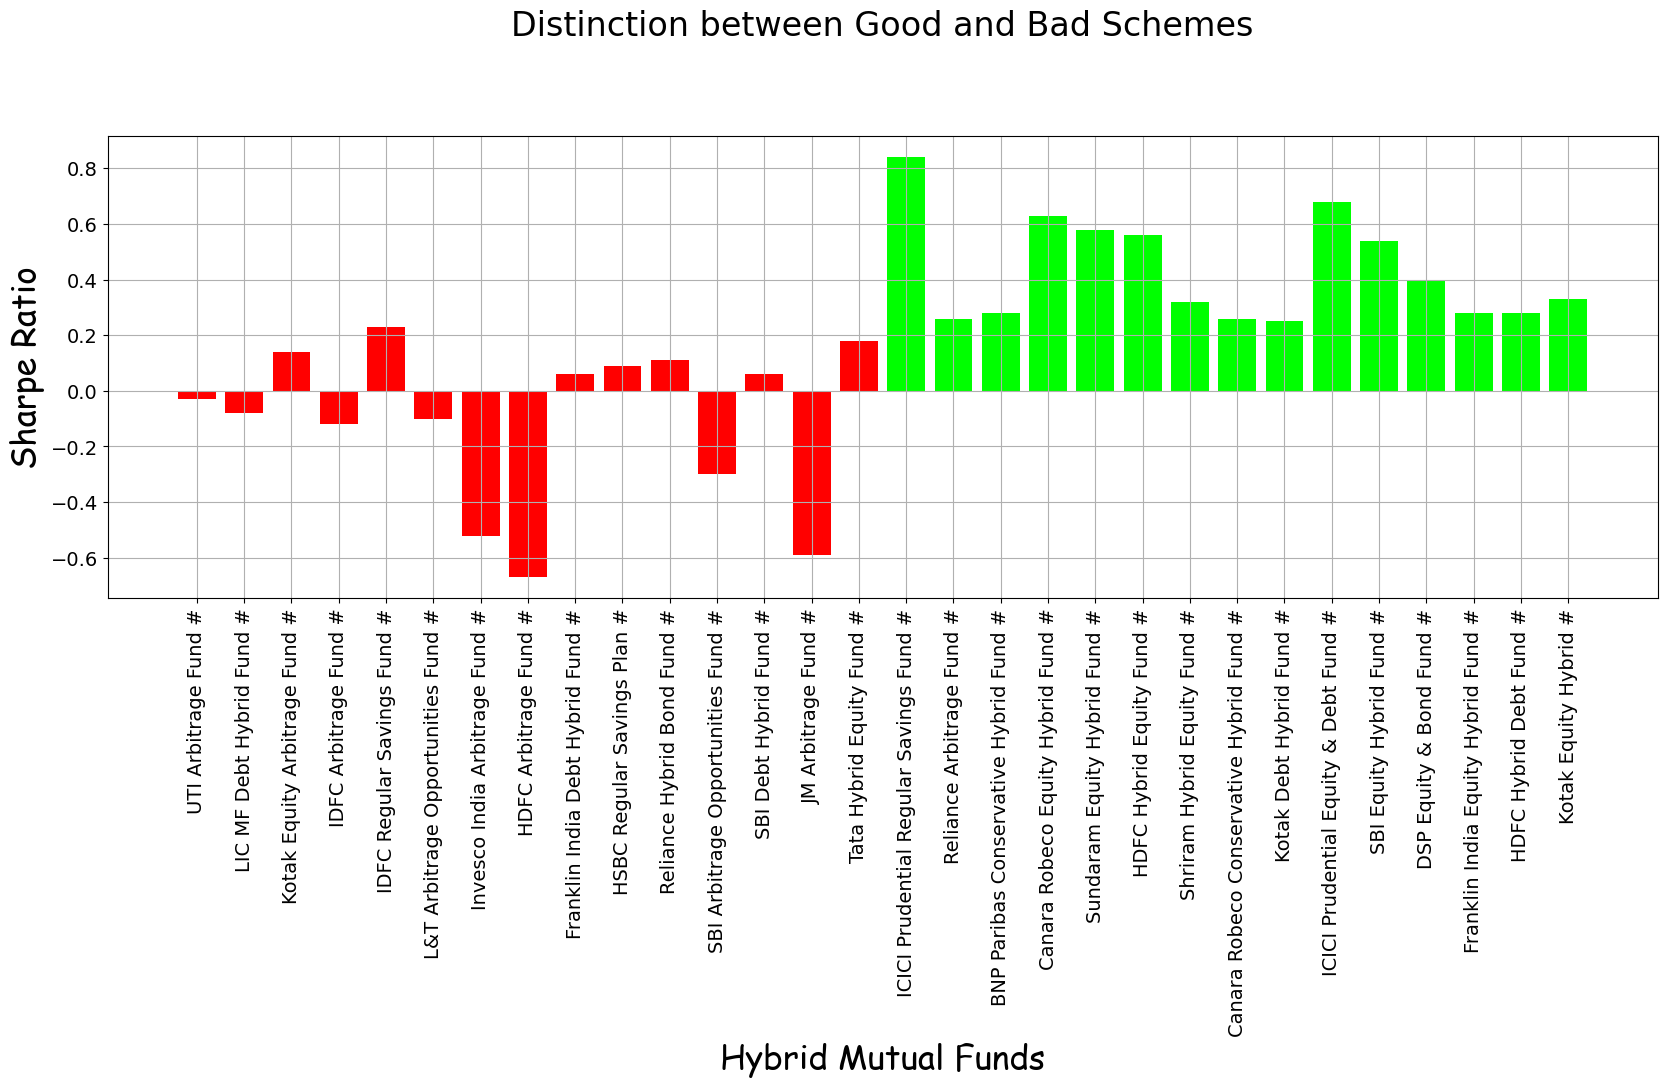

In [196]:
X = data['Fund_Scheme_Name']
Y = data['Sharpe_Ratio']

mask1 = Y < 0.24
mask2 = Y >= 0.24

plt.bar(X[mask1], Y[mask1], color = 'red')
plt.bar(X[mask2], Y[mask2], color = 'lime')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Sharpe Ratio', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Distinction between Good and Bad Schemes', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

In [219]:
# Filtering good and bad based on above conditions

for index, row in data.iterrows():
    A=row['Fund_Scheme_Name']
    B=row['R_Squared']
    C=row['Net_Return']
    D=row['Beta']
    E=row['Alpha']
    F=row['Sharpe_Ratio']
     
    if (B>=85 and C>=10 and D>=0.995 and E>0.58 and F>0.24):     
        print(A)
        data.loc[index, 'Good'] = 1
    else:
        data.loc[index, 'Good'] = 0

ICICI Prudential Regular Savings Fund #
Reliance Arbitrage Fund #
Canara Robeco Equity Hybrid Fund #
Canara Robeco Conservative Hybrid Fund #
Kotak Debt Hybrid Fund #
ICICI Prudential Equity & Debt Fund #
Franklin India Equity Hybrid Fund #
HDFC Hybrid Debt Fund #


In [220]:
category=data['Good'].unique().tolist()
# converin categories to list
category_frequency = data['Good'].value_counts().to_dict()
# converting category_frequency to dictionary

count = category_frequency.values()
#print(count)

def getList(category_frequency): 
    list = [] 
    for value in category_frequency.values(): 
        list.append(value) 
          
    return list          # returns list
      
category_count=getList(category_frequency)

### Percentage of Good and Bad schemes:

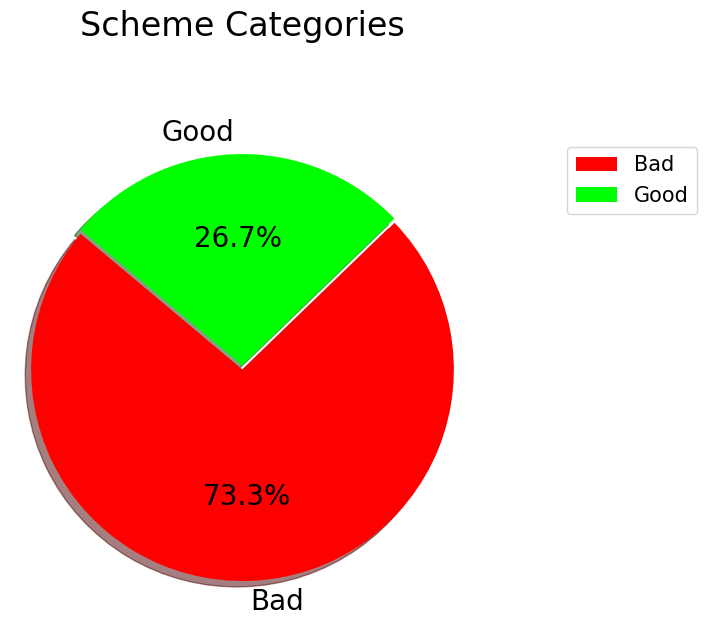

In [221]:
labels = ['Bad', 'Good']
colors = ['red', 'lime']
explode = (0.01, 0.01)  


plt.pie(category_count, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140, autopct='%1.1f%%')
plt.title('Scheme Categories', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.5,1.0), fontsize=15)
plt.axis('equal')
plt.rcParams['figure.figsize']=(6,6)
plt.rcParams['font.size'] = 20
plt.show()

In [226]:

# correlation_matrix = data.corr()

# # Set a correlation threshold (e.g., 0.5)
# correlation_threshold = 0.5

# # Find features with correlation above the threshold
# important_features = correlation_matrix[abs(correlation_matrix) > correlation_threshold]

# # List or visualize the important features
# print("Important Features:")
# print(important_features)


Important Features:
                 Unnamed: 0  Sl_No.  Net_Assets_(Cr)  1_Yr_Return  \
Unnamed: 0              1.0     1.0              NaN          NaN   
Sl_No.                  1.0     1.0              NaN          NaN   
Net_Assets_(Cr)         NaN     NaN         1.000000     0.534852   
1_Yr_Return             NaN     NaN         0.534852     1.000000   
3_Yr_Return             NaN     NaN         0.575556     0.593781   
5_Yr_Return             NaN     NaN         0.567539          NaN   
Expense_Ratio           NaN     NaN              NaN          NaN   
Sharpe_Ratio            NaN     NaN              NaN     0.555660   
Sortino_Ratio           NaN     NaN              NaN     0.571247   
Alpha                   NaN     NaN              NaN          NaN   
Beta                    NaN     NaN              NaN          NaN   
Std_Dev                 NaN     NaN              NaN          NaN   
R_Squared               NaN     NaN              NaN     0.512784   
Year_Trailing 